# Exploratory Analysis

Having cleaned our raw data in the previous notebook, we now have the appropriate data that we can work with.

Our main goal is to predict the `Severity` of the accident based on the different variables that we are given. Thus, we now want to find the relationship of the different variables with the `Severity` of the accident

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt
sb.set()

In [2]:
cal_accident_df = pd.read_csv('california_accident_data.csv')

We then look at the summary of the data given

In [3]:
cal_accident_df.head()

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,Zipcode,Humidity(%),...,Nautical_Twilight,Astronomical_Twilight,Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure,Road_Type
0,2,2,2022-08-20 13:13:00,34.661189,-120.492822,Floradale Ave,Lompoc,Santa Barbara,93436,73.0,...,Day,Day,0.0352,16.0,20.8,20.000000,20.000000,0.0,756.666,Avenue
1,4,2,2020-12-04 01:46:00,35.395484,-118.985176,River Blvd,Bakersfield,Kern,93305-2649,34.0,...,Night,Night,0.0736,16.0,0.0,5.555556,5.555556,0.0,756.158,Boulevard
2,13,2,2022-02-18 16:53:00,32.771645,-117.161407,Friars Rd,San Diego,San Diego,92108,40.0,...,Day,Day,4.5520,16.0,22.4,17.222222,17.222222,0.0,754.126,Road
3,21,2,2020-06-15 08:17:29,34.243271,-118.424461,Bartee Ave,Arleta,Los Angeles,91331-4606,64.0,...,Day,Day,0.0000,16.0,8.0,17.777778,17.777778,NaN,734.568,Avenue
4,27,2,2022-03-22 07:22:30,33.120965,-117.321490,I-5 S,Carlsbad,San Diego,92011,72.0,...,Day,Day,2.6016,16.0,9.6,12.777778,12.777778,0.0,753.872,Interstate


In [4]:
print('shape:', cal_accident_df.shape)
print(cal_accident_df.info())

shape: (113274, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113274 entries, 0 to 113273
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             113274 non-null  int64  
 1   Severity               113274 non-null  int64  
 2   Start_Time             113274 non-null  object 
 3   Start_Lat              113274 non-null  float64
 4   Start_Lng              113274 non-null  float64
 5   Street                 113113 non-null  object 
 6   City                   113274 non-null  object 
 7   County                 113274 non-null  object 
 8   Zipcode                113236 non-null  object 
 9   Humidity(%)            110220 non-null  float64
 10  Wind_Direction         110363 non-null  object 
 11  Weather_Condition      110753 non-null  object 
 12  Amenity                113274 non-null  bool   
 13  Bump                   113274 non-null  bool   
 14  Crossing        

In [5]:
cal_accident_df.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,113274.000000,113274.000000,113274.000000,113274.000000,110220.000000,113274.000000,110743.000000,102769.000000,110382.000000,80310.000000,76713.000000,110969.000000
mean,249718.106079,2.166075,35.634003,-119.499273,58.857322,0.788574,14.529272,10.440733,17.684460,17.049012,0.102930,752.589038
std,144340.436636,0.407133,2.092862,1.937347,24.220014,2.253625,4.021104,9.345152,7.546929,8.092259,0.636261,19.596280
min,2.000000,1.000000,32.543114,-124.367607,2.000000,0.000000,0.000000,0.000000,-22.222222,-22.222222,0.000000,491.744000
25%,124771.500000,2.000000,33.975302,-121.518977,40.000000,0.000000,16.000000,4.800000,12.777778,12.222222,0.000000,752.348000
50%,249713.500000,2.000000,34.237553,-118.441540,62.000000,0.040000,16.000000,9.600000,17.222222,16.666667,0.000000,758.444000
75%,374587.500000,2.000000,37.702557,-117.921642,78.000000,0.694400,16.000000,14.400000,22.222222,22.222222,0.000000,761.746000
max,499994.000000,4.000000,42.000100,-114.156175,100.000000,80.499200,160.000000,1316.480000,97.222222,97.222222,20.320000,976.376000


## Analysis: Severity

`Severity`: A scale from 1-4 on how severe the accident is, with 1 being the least severe and 4 being the most

Now, let's do some EDA on `Severity`

In [6]:
cal_accident_df['Severity'].describe()

count    113274.000000
mean          2.166075
std           0.407133
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: Severity, dtype: float64

number of Severity levels: 4
          count      %
Severity              
2         93972  82.96
3         17758  15.68
4           866   0.76
1           678   0.60


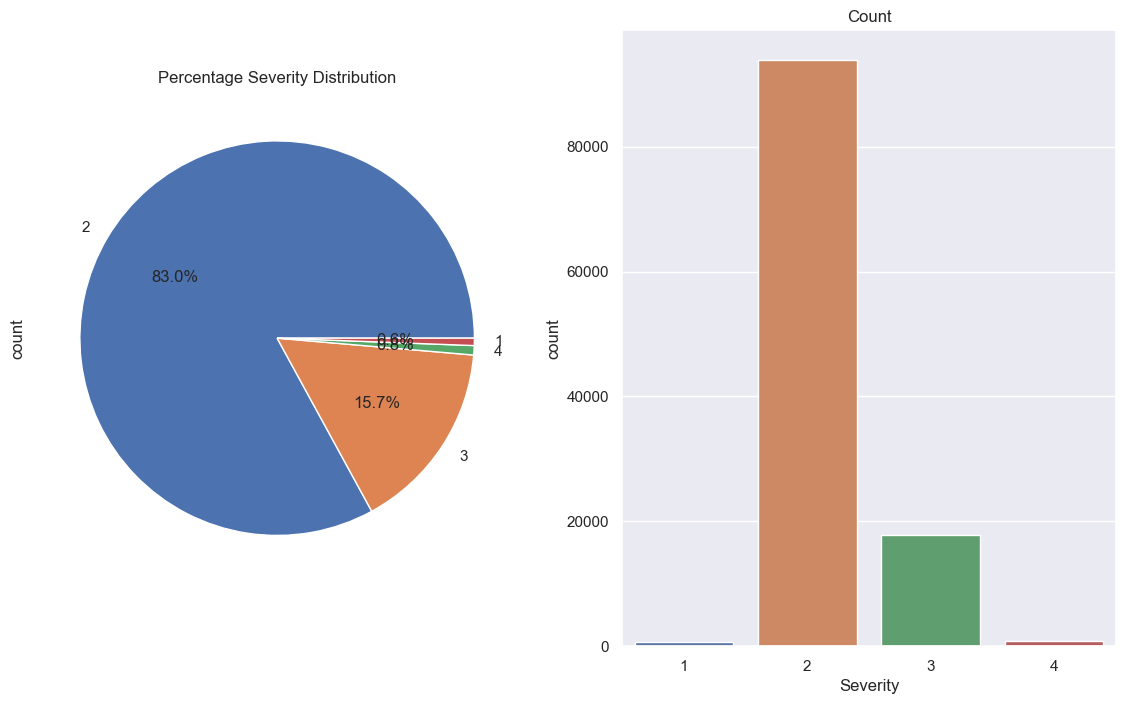

In [7]:
# print count and ratio of total count of the different severity levels
print('number of Severity levels:', len(cal_accident_df['Severity'].unique()))
count = cal_accident_df['Severity'].value_counts()
ratio = round(cal_accident_df['Severity'].value_counts(normalize=True) * 100, 2)
tmp = pd.concat([count, ratio], axis=1, keys=['count', '%'])
print(tmp)

# plot bar and pie chart
f, axes = plt.subplots(1, 2, figsize=(14, 8))

axes[0].set_title('Percentage Severity Distribution')
cal_accident_df['Severity'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[0])

axes[1].set_title('Count')
sb.countplot(x = 'Severity', data = cal_accident_df, ax = axes[1])

plt.show()

From the above, we can see that the average `Severity` level is 2, with the mean, median and mode of `Severity` being 2. We also note that the `Severity` level of 1 & 4 are minimal, with their percentage distribution being less than 1%. This information will be helpful for us later on in our EDA

## Null Values

We want to see the number of null values that each variable has

In [8]:
count = cal_accident_df.isna().sum()
ratio = round(cal_accident_df.isna().mean() * 100, 2)
null_values = pd.concat([count, ratio], axis = 1, keys = ['count', '%'])
print(null_values.sort_values(by='%', ascending=False))

                       count      %
Precipitation          36561  32.28
Wind_Chill             32964  29.10
Wind_Speed             10505   9.27
Humidity(%)             3054   2.70
Wind_Direction          2911   2.57
Temperature             2892   2.55
Visibility              2531   2.23
Weather_Condition       2521   2.23
Pressure                2305   2.03
Road_Type               2223   1.96
Street                   161   0.14
Astronomical_Twilight     74   0.07
Nautical_Twilight         74   0.07
Civil_Twilight            74   0.07
Sunrise_Sunset            74   0.07
Zipcode                   38   0.03
Stop                       0   0.00
Distance                   0   0.00
Turning_Loop               0   0.00
Traffic_Signal             0   0.00
Traffic_Calming            0   0.00
Unnamed: 0                 0   0.00
Station                    0   0.00
Roundabout                 0   0.00
Severity                   0   0.00
No_Exit                    0   0.00
Junction                   0

## Analysis: Date & Time

The variable `Start_Time` provide us with the date and time of the accident. Let us first convert the column type to python `datetime` object. This will make it easier for us when comparing and grouping them.

In [9]:
# convert Start_Time to datetime object
cal_accident_df['Start_Time'] = pd.to_datetime(cal_accident_df['Start_Time'])
print(cal_accident_df['Start_Time'].dtype)

datetime64[ns]


### Month

Let us group them by their month and severity level

Severity      1      2     3    4
Start_Time                       
1             0   9567  1336   66
2             3   8883  1249   56
3            54   7355  1399   75
4           164   7237  1656   74
5           149   6522  1588   80
6           120   6535  1694   75
7            66   5415  1488   81
8            78   6249  1533  117
9            35   8112  1549   62
10            4   8098  1445   48
11            4   9198  1489   58
12            1  10801  1332   74


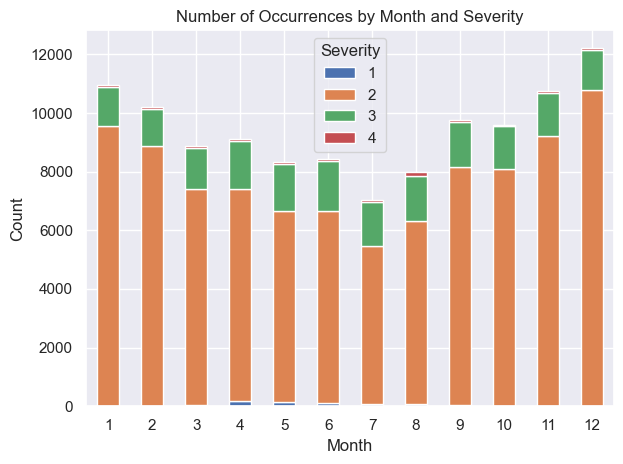

In [10]:
# Group DataFrame by month and severity, and count occurrences
month_counts = cal_accident_df.groupby([cal_accident_df['Start_Time'].dt.month, 'Severity']).size().unstack(fill_value=0)
print(month_counts)

# Plot a stacked bar graph
month_counts.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Occurrences by Month and Severity')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

                1      %      2      %     3     %    4      %
Start_Time                                                    
1             0.0   0.00   9567  10.18  1336  7.52   66   7.62
2             3.0   0.44   8883   9.45  1249  7.03   56   6.47
3            54.0   7.96   7355   7.83  1399  7.88   75   8.66
4           164.0  24.19   7237   7.70  1656  9.33   74   8.55
5           149.0  21.98   6522   6.94  1588  8.94   80   9.24
6           120.0  17.70   6535   6.95  1694  9.54   75   8.66
7            66.0   9.73   5415   5.76  1488  8.38   81   9.35
8            78.0  11.50   6249   6.65  1533  8.63  117  13.51
9            35.0   5.16   8112   8.63  1549  8.72   62   7.16
10            4.0   0.59   8098   8.62  1445  8.14   48   5.54
11            4.0   0.59   9198   9.79  1489  8.38   58   6.70
12            1.0   0.15  10801  11.49  1332  7.50   74   8.55


<Axes: title={'center': 'Severity = 4'}, xlabel='Start_Time'>

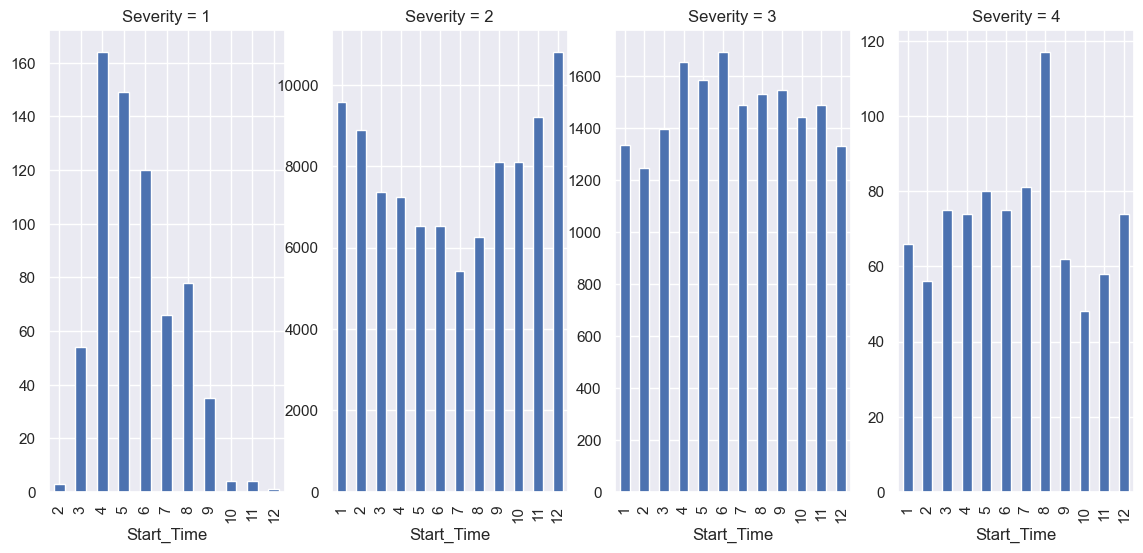

In [11]:
# group them by severity
acc_severity_1 = pd.DataFrame(cal_accident_df[cal_accident_df['Severity'] == 1])
acc_severity_2 = pd.DataFrame(cal_accident_df[cal_accident_df['Severity'] == 2])
acc_severity_3 = pd.DataFrame(cal_accident_df[cal_accident_df['Severity'] == 3])
acc_severity_4 = pd.DataFrame(cal_accident_df[cal_accident_df['Severity'] == 4])

month_counts_1 = acc_severity_1.groupby(acc_severity_1['Start_Time'].dt.month).size()
percentage_1 = round((month_counts_1 / month_counts_1.sum()) * 100, 2)
month_counts_2 = acc_severity_2.groupby(acc_severity_2['Start_Time'].dt.month).size()
percentage_2 = round((month_counts_2 / month_counts_2.sum()) * 100, 2)
month_counts_3 = acc_severity_3.groupby(acc_severity_3['Start_Time'].dt.month).size()
percentage_3 = round((month_counts_3 / month_counts_3.sum()) * 100, 2)
month_counts_4 = acc_severity_4.groupby(acc_severity_4['Start_Time'].dt.month).size()
percentage_4 = round((month_counts_4 / month_counts_4.sum()) * 100, 2)

tmp = pd.concat([month_counts_1, percentage_1,
                 month_counts_2, percentage_2,
                 month_counts_3, percentage_3,
                 month_counts_4, percentage_4],
                 axis=1, keys=['1', '%', '2', '%', '3', '%', '4', '%'])
tmp = tmp.fillna(0)
tmp = tmp.sort_index(ascending=True)
print(tmp)


# plot graph
f, axes = plt.subplots(1, 4, figsize= (14, 6))
month_counts_1.plot(kind='bar', title='Severity = 1', ax=axes[0])
month_counts_2.plot(kind='bar', title='Severity = 2', ax=axes[1])
month_counts_3.plot(kind='bar', title='Severity = 3', ax=axes[2])
month_counts_4.plot(kind='bar', title='Severity = 4', ax=axes[3])

### Conclusion

It seems that the number of accidents are most during the start and end of the year while it is at its least during the middle of the year. However, upon further inspection, this seems to be only true for `Severity=2`. 

Futher inspection of other factors may lead explain the differing trends

### Day

Let us group them by their day and severity level

Severity      1      2     3    4
Start_Time                       
Monday      118  13796  2647  133
Tuesday     104  14804  2743  128
Wednesday    97  15037  2691  126
Thursday    108  15198  2904  144
Friday      131  16246  2934  151
Saturday     57  10229  2059   84
Sunday       63   8662  1780  100


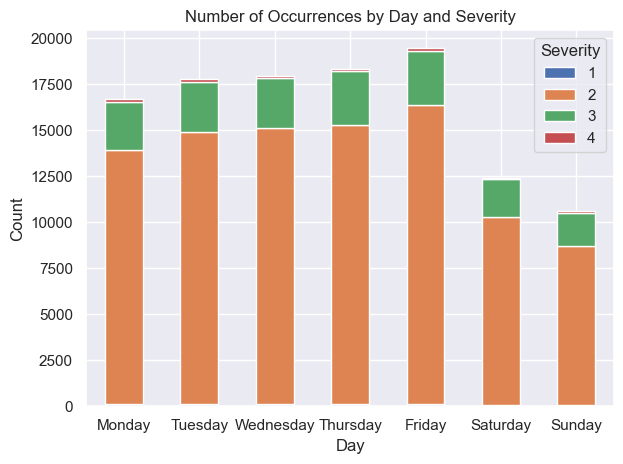

In [12]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group DataFrame by month and severity, and count occurrences
day_counts = cal_accident_df.groupby([cal_accident_df['Start_Time'].dt.day_name(), 'Severity']).size().unstack(fill_value=0)
day_counts = day_counts.reindex(day_order)
print(day_counts)

# Plot a stacked bar graph
day_counts.plot(kind='bar', stacked=True)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Number of Occurrences by Day and Severity')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

              1      %      2      %     3      %    4      %
Start_Time                                                   
Monday      118  17.40  13796  14.68  2647  14.91  133  15.36
Tuesday     104  15.34  14804  15.75  2743  15.45  128  14.78
Wednesday    97  14.31  15037  16.00  2691  15.15  126  14.55
Thursday    108  15.93  15198  16.17  2904  16.35  144  16.63
Friday      131  19.32  16246  17.29  2934  16.52  151  17.44
Saturday     57   8.41  10229  10.89  2059  11.59   84   9.70
Sunday       63   9.29   8662   9.22  1780  10.02  100  11.55


<Axes: title={'center': 'Severity = 4'}, xlabel='Start_Time'>

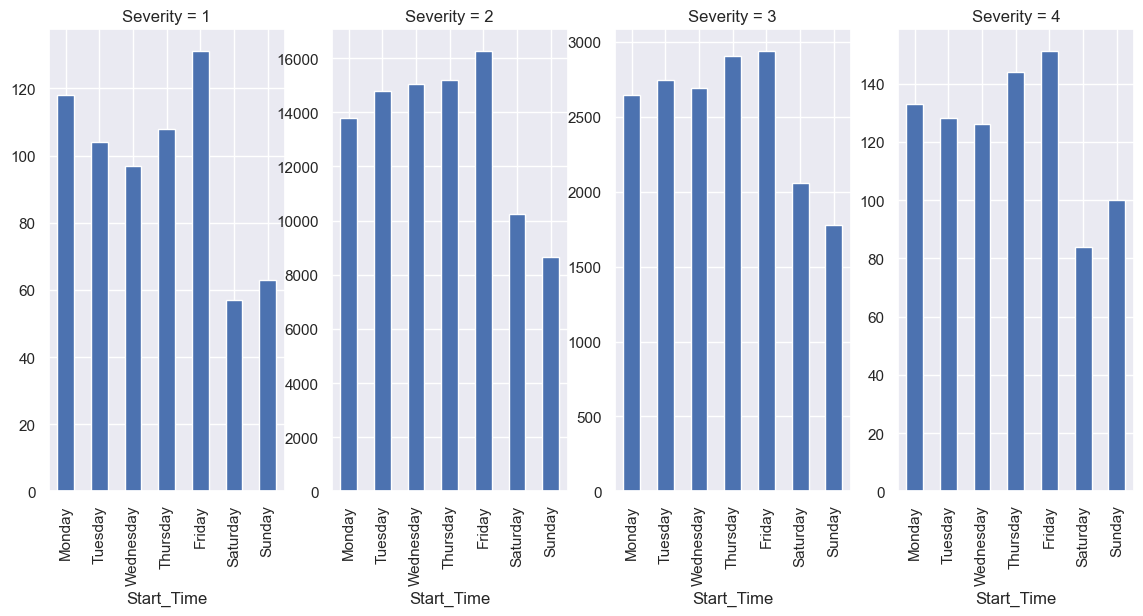

In [13]:
day_counts_1 = acc_severity_1.groupby(acc_severity_1['Start_Time'].dt.day_name()).size()
percentage_1 = round((day_counts_1 / day_counts_1.sum()) * 100, 2)
day_counts_2 = acc_severity_2.groupby(acc_severity_2['Start_Time'].dt.day_name()).size()
percentage_2 = round((day_counts_2 / day_counts_2.sum()) * 100, 2)
day_counts_3 = acc_severity_3.groupby(acc_severity_3['Start_Time'].dt.day_name()).size()
percentage_3 = round((day_counts_3 / day_counts_3.sum()) * 100, 2)
day_counts_4 = acc_severity_4.groupby(acc_severity_4['Start_Time'].dt.day_name()).size()
percentage_4 = round((day_counts_4 / day_counts_4.sum()) * 100, 2)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts_1 = day_counts_1.reindex(day_order)
day_counts_2 = day_counts_2.reindex(day_order)
day_counts_3 = day_counts_3.reindex(day_order)
day_counts_4 = day_counts_4.reindex(day_order)

tmp = pd.concat([day_counts_1, percentage_1,
                 day_counts_2, percentage_2,
                 day_counts_3, percentage_3,
                 day_counts_4, percentage_4],
                 axis=1, keys=['1', '%', '2', '%', '3', '%', '4', '%'])

# tmp = tmp.reindex(day_order)
print(tmp)


# plot graph
f, axes = plt.subplots(1, 4, figsize= (14, 6))
day_counts_1.plot(kind='bar', title='Severity = 1', ax=axes[0])
day_counts_2.plot(kind='bar', title='Severity = 2', ax=axes[1])
day_counts_3.plot(kind='bar', title='Severity = 3', ax=axes[2])
day_counts_4.plot(kind='bar', title='Severity = 4', ax=axes[3])

### Conclusion

It seems that all `Severity` levels follow the trend of higher number of accidents in the weekdays, with the most occuring on Friday, with a significant drop on the weekends. This is as suspected as most people are working on the weekdays, meaning that they need to commute work and with more people on the roads, more accidents tend to happen

### Hour

Let us group them by their hour and severity level

Severity     1     2     3   4
Start_Time                    
0           17  1987   376  34
1           16  1770   289  18
2           17  1791   345  24
3           16  1440   303  29
4           30  1891   413  29
5           40  3156   591  41
6           33  4381   816  37
7           42  5380   925  29
8           52  5150  1052  49
9           21  4134   941  33
10          15  3868  1001  40
11          12  4144   976  34
12          18  4501   873  44
13          38  5065   871  47
14          42  6133   953  52
15          40  6741  1140  58
16          48  6381  1041  39
17          43  6644  1104  39
18          47  5186   991  36
19          24  3725   754  35
20          26  3045   647  27
21          19  2755   527  45
22          10  2511   449  22
23          12  2193   380  25


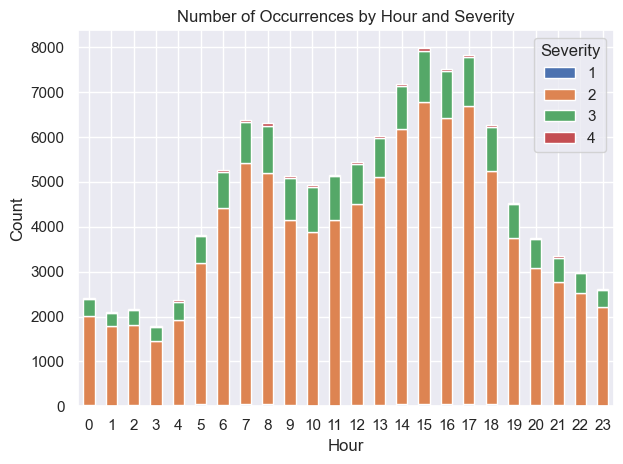

In [14]:
# Group DataFrame by hour and severity, and count occurrences
hour_counts = cal_accident_df.groupby([cal_accident_df['Start_Time'].dt.hour, 'Severity']).size().unstack(fill_value=0)
print(hour_counts)

# Plot a stacked bar graph
hour_counts.plot(kind='bar', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Number of Occurrences by Hour and Severity')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

             1     %     2     %     3     %   4     %
Start_Time                                            
0           17  2.51  1987  2.11   376  2.12  34  3.93
1           16  2.36  1770  1.88   289  1.63  18  2.08
2           17  2.51  1791  1.91   345  1.94  24  2.77
3           16  2.36  1440  1.53   303  1.71  29  3.35
4           30  4.42  1891  2.01   413  2.33  29  3.35
5           40  5.90  3156  3.36   591  3.33  41  4.73
6           33  4.87  4381  4.66   816  4.60  37  4.27
7           42  6.19  5380  5.73   925  5.21  29  3.35
8           52  7.67  5150  5.48  1052  5.92  49  5.66
9           21  3.10  4134  4.40   941  5.30  33  3.81
10          15  2.21  3868  4.12  1001  5.64  40  4.62
11          12  1.77  4144  4.41   976  5.50  34  3.93
12          18  2.65  4501  4.79   873  4.92  44  5.08
13          38  5.60  5065  5.39   871  4.90  47  5.43
14          42  6.19  6133  6.53   953  5.37  52  6.00
15          40  5.90  6741  7.17  1140  6.42  58  6.70
16        

<Axes: title={'center': 'Severity = 4'}, xlabel='Start_Time'>

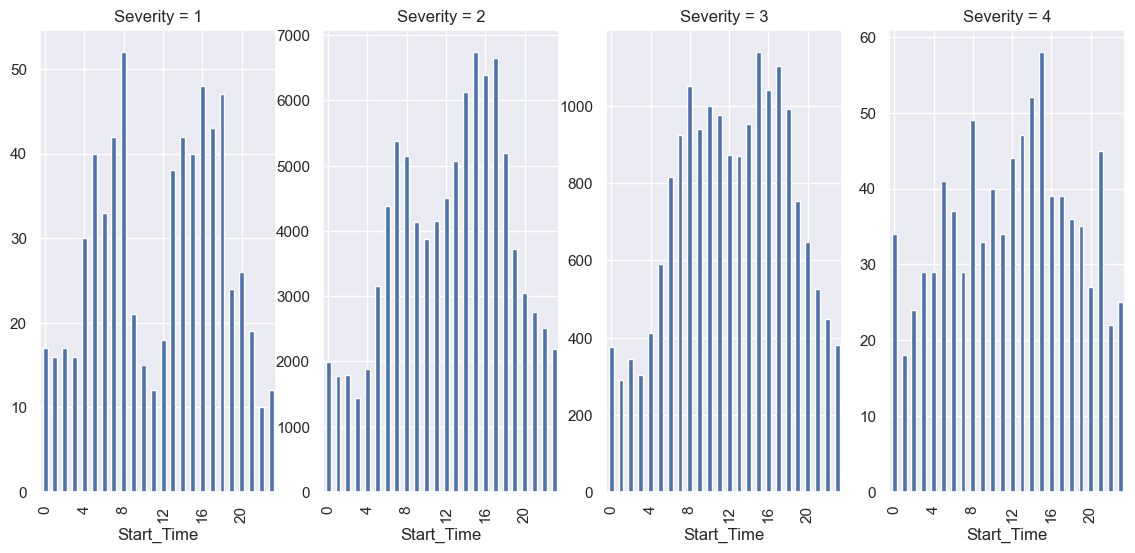

In [15]:
hour_counts_1 = acc_severity_1.groupby(acc_severity_1['Start_Time'].dt.hour).size()
percentage_1 = round((hour_counts_1 / hour_counts_1.sum()) * 100, 2)
hour_counts_2 = acc_severity_2.groupby(acc_severity_2['Start_Time'].dt.hour).size()
percentage_2 = round((hour_counts_2 / hour_counts_2.sum()) * 100, 2)
hour_counts_3 = acc_severity_3.groupby(acc_severity_3['Start_Time'].dt.hour).size()
percentage_3 = round((hour_counts_3 / hour_counts_3.sum()) * 100, 2)
hour_counts_4 = acc_severity_4.groupby(acc_severity_4['Start_Time'].dt.hour).size()
percentage_4 = round((hour_counts_4 / hour_counts_4.sum()) * 100, 2)

tmp = pd.concat([hour_counts_1, percentage_1,
                 hour_counts_2, percentage_2,
                 hour_counts_3, percentage_3,
                 hour_counts_4, percentage_4],
                 axis=1, keys=['1', '%', '2', '%', '3', '%', '4', '%'])

# tmp = tmp.reindex(day_order)
print(tmp)


# plot graph
f, axes = plt.subplots(1, 4, figsize= (14, 6))
hour_counts_1.plot(kind='bar', title='Severity = 1', ax=axes[0], xticks=range(0, 24, 4))
hour_counts_2.plot(kind='bar', title='Severity = 2', ax=axes[1], xticks=range(0, 24, 4))
hour_counts_3.plot(kind='bar', title='Severity = 3', ax=axes[2], xticks=range(0, 24, 4))
hour_counts_4.plot(kind='bar', title='Severity = 4', ax=axes[3], xticks=range(0, 24, 4))

### Conclusion

It seems that there is a spike in the number of accidents from hour 7-8 and 3-5. This could be due to the fact that people are going out to work in the morning and coming back home in the evening, causing an increase in traffic and thus higher risk of accident occuring

## Analysis: boolean values

From the summary, we can see that columns 12 to 24 consist of boolean values. These variables are main road features such as objects, road sign, buildings. We then decided to see the relationship of the different variables with `Severity`

In [16]:
bool_cols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop',
             'Traffic_Calming','Traffic_Signal','Turning_Loop']

In [17]:
# print count and corresponding ratio of T/F
for col in bool_cols:
    count = cal_accident_df[col].value_counts()
    ratio = round(cal_accident_df[col].value_counts(normalize=True) * 100, 2)
    tmp = pd.concat([count, ratio], axis=1, keys=['count', '%'])
    print(tmp)
    print('-'*40)

          count      %
Amenity               
False    112423  99.25
True        851   0.75
----------------------------------------
        count      %
Bump                
False  113214  99.95
True       60   0.05
----------------------------------------
           count      %
Crossing               
False     107294  94.72
True        5980   5.28
----------------------------------------
           count      %
Give_Way               
False     113127  99.87
True         147   0.13
----------------------------------------
           count      %
Junction               
False     101298  89.43
True       11976  10.57
----------------------------------------
          count      %
No_Exit               
False    113152  99.89
True        122   0.11
----------------------------------------
          count      %
Railway               
False    112123  98.98
True       1151   1.02
----------------------------------------
             count      %
Roundabout               
False       1

## Conclusion

From the above data, we can see that almost all of the columns have at > 90% False outcome (`Junction` has 89 % False but we round it up to 90 %)

This makes sense as the presence of such road features would make drivers be more alert and thus would react accordingly to their surroundings and environment

## Analysing boolean values

From the summary, we can see that columns 12 to 24 consist of boolean values. These variables are main road features such as objects, road sign, buildings. We then decided to see the relationship of the different variables with `Severity`

In [18]:
bool_cols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop',
             'Traffic_Calming','Traffic_Signal','Turning_Loop']

In [19]:
# print count and corresponding ratio of T/F
for col in bool_cols:
    count = cal_accident_df[col].value_counts()
    ratio = cal_accident_df[col].value_counts(normalize=True)
    tmp = pd.concat([count, ratio], axis=1, keys=['count', 'ratio'])
    print(tmp)
    print('-'*40)

          count     ratio
Amenity                  
False    112423  0.992487
True        851  0.007513
----------------------------------------
        count    ratio
Bump                  
False  113214  0.99947
True       60  0.00053
----------------------------------------
           count     ratio
Crossing                  
False     107294  0.947208
True        5980  0.052792
----------------------------------------
           count     ratio
Give_Way                  
False     113127  0.998702
True         147  0.001298
----------------------------------------
           count     ratio
Junction                  
False     101298  0.894274
True       11976  0.105726
----------------------------------------
          count     ratio
No_Exit                  
False    113152  0.998923
True        122  0.001077
----------------------------------------
          count     ratio
Railway                  
False    112123  0.989839
True       1151  0.010161
--------------------------

From the above data, we can see that almost all of the columns have at > 90% False outcome (`Junction` has 89 % False but we round it up to 90 %)

# Analysing numerical data

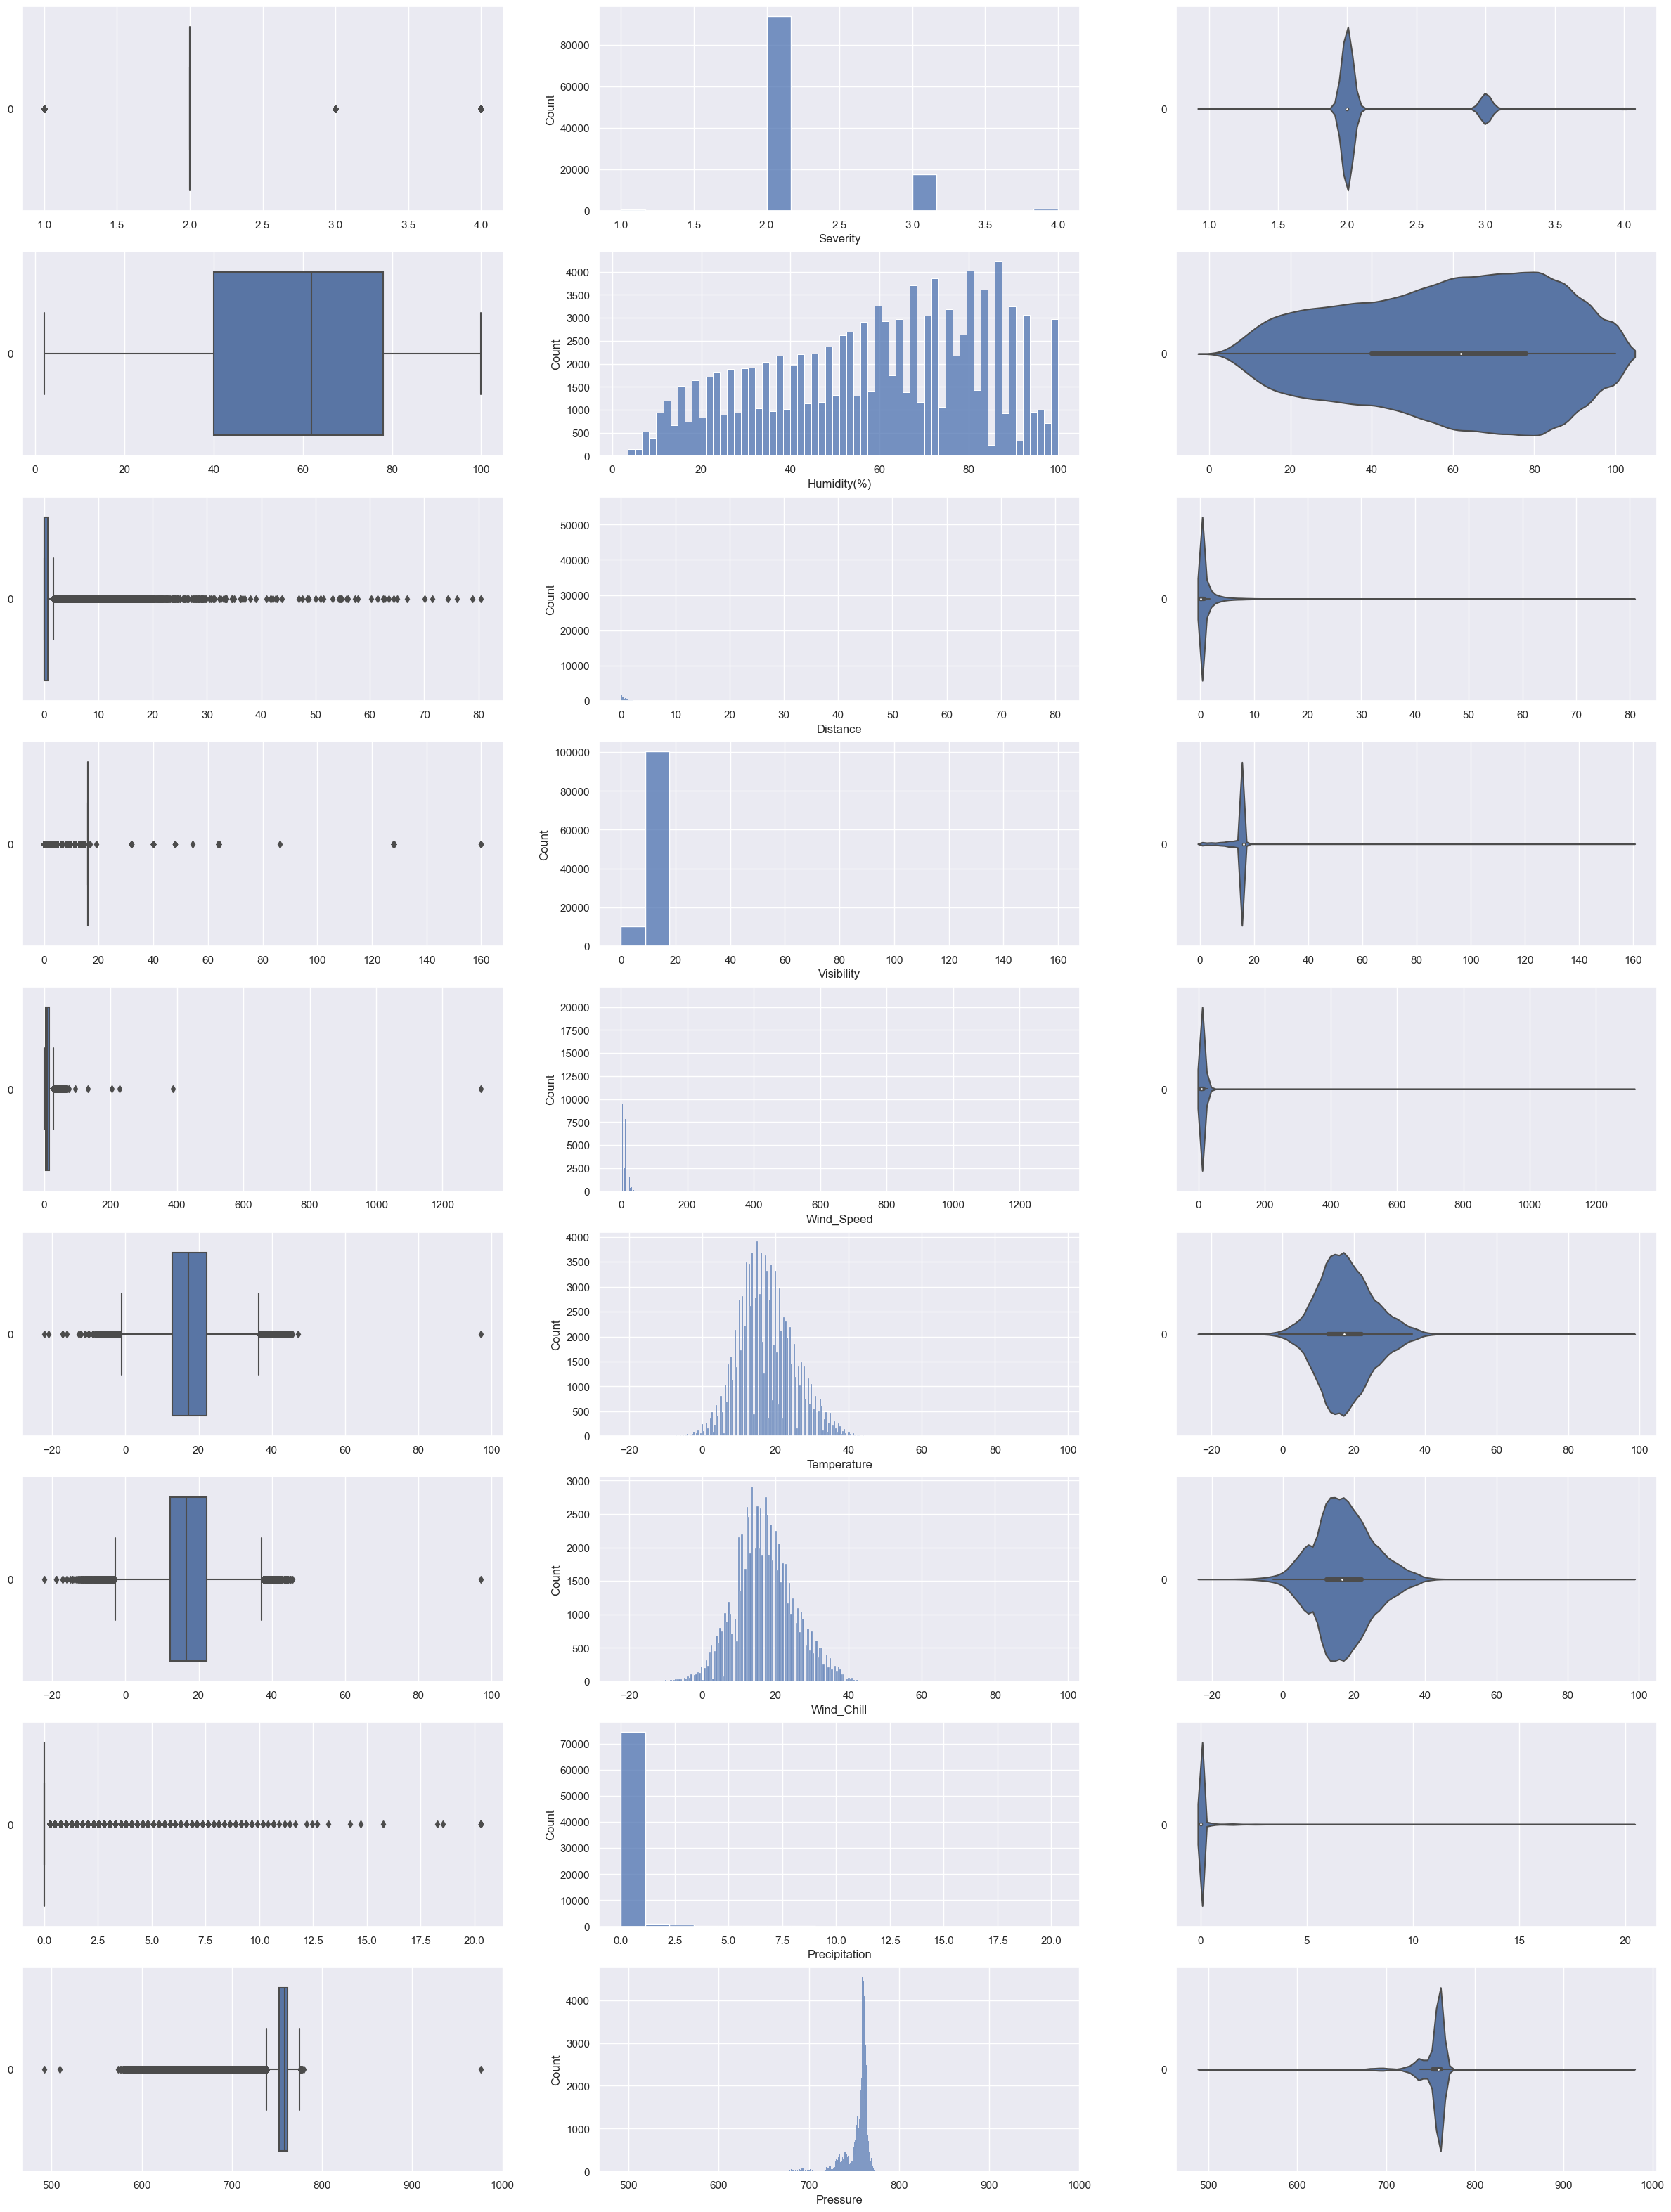

In [20]:
numeric_data = pd.DataFrame(cal_accident_df[["Severity", "Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature", 
                                             "Wind_Chill", "Precipitation", "Pressure"]])

f, axes = plt.subplots(9, 3, figsize=(30, 40))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1



               Severity  Humidity(%)  Distance  Visibility  Wind_Speed  \
Severity       1.000000     0.021013 -0.085983    0.002775    0.049662   
Humidity(%)    0.021013     1.000000 -0.021543   -0.345829   -0.192080   
Distance      -0.085983    -0.021543  1.000000   -0.020004   -0.008569   
Visibility     0.002775    -0.345829 -0.020004    1.000000    0.071107   
Wind_Speed     0.049662    -0.192080 -0.008569    0.071107    1.000000   
Temperature    0.047304    -0.653468 -0.013733    0.208197    0.210874   
Wind_Chill     0.024173    -0.654052 -0.004811    0.213557    0.211541   
Precipitation  0.037357     0.200413 -0.007628   -0.282480    0.097633   
Pressure       0.102939     0.117206 -0.128514    0.050549   -0.017133   

               Temperature  Wind_Chill  Precipitation  Pressure  
Severity          0.047304    0.024173       0.037357  0.102939  
Humidity(%)      -0.653468   -0.654052       0.200413  0.117206  
Distance         -0.013733   -0.004811      -0.007628 -0.1285

<Axes: >

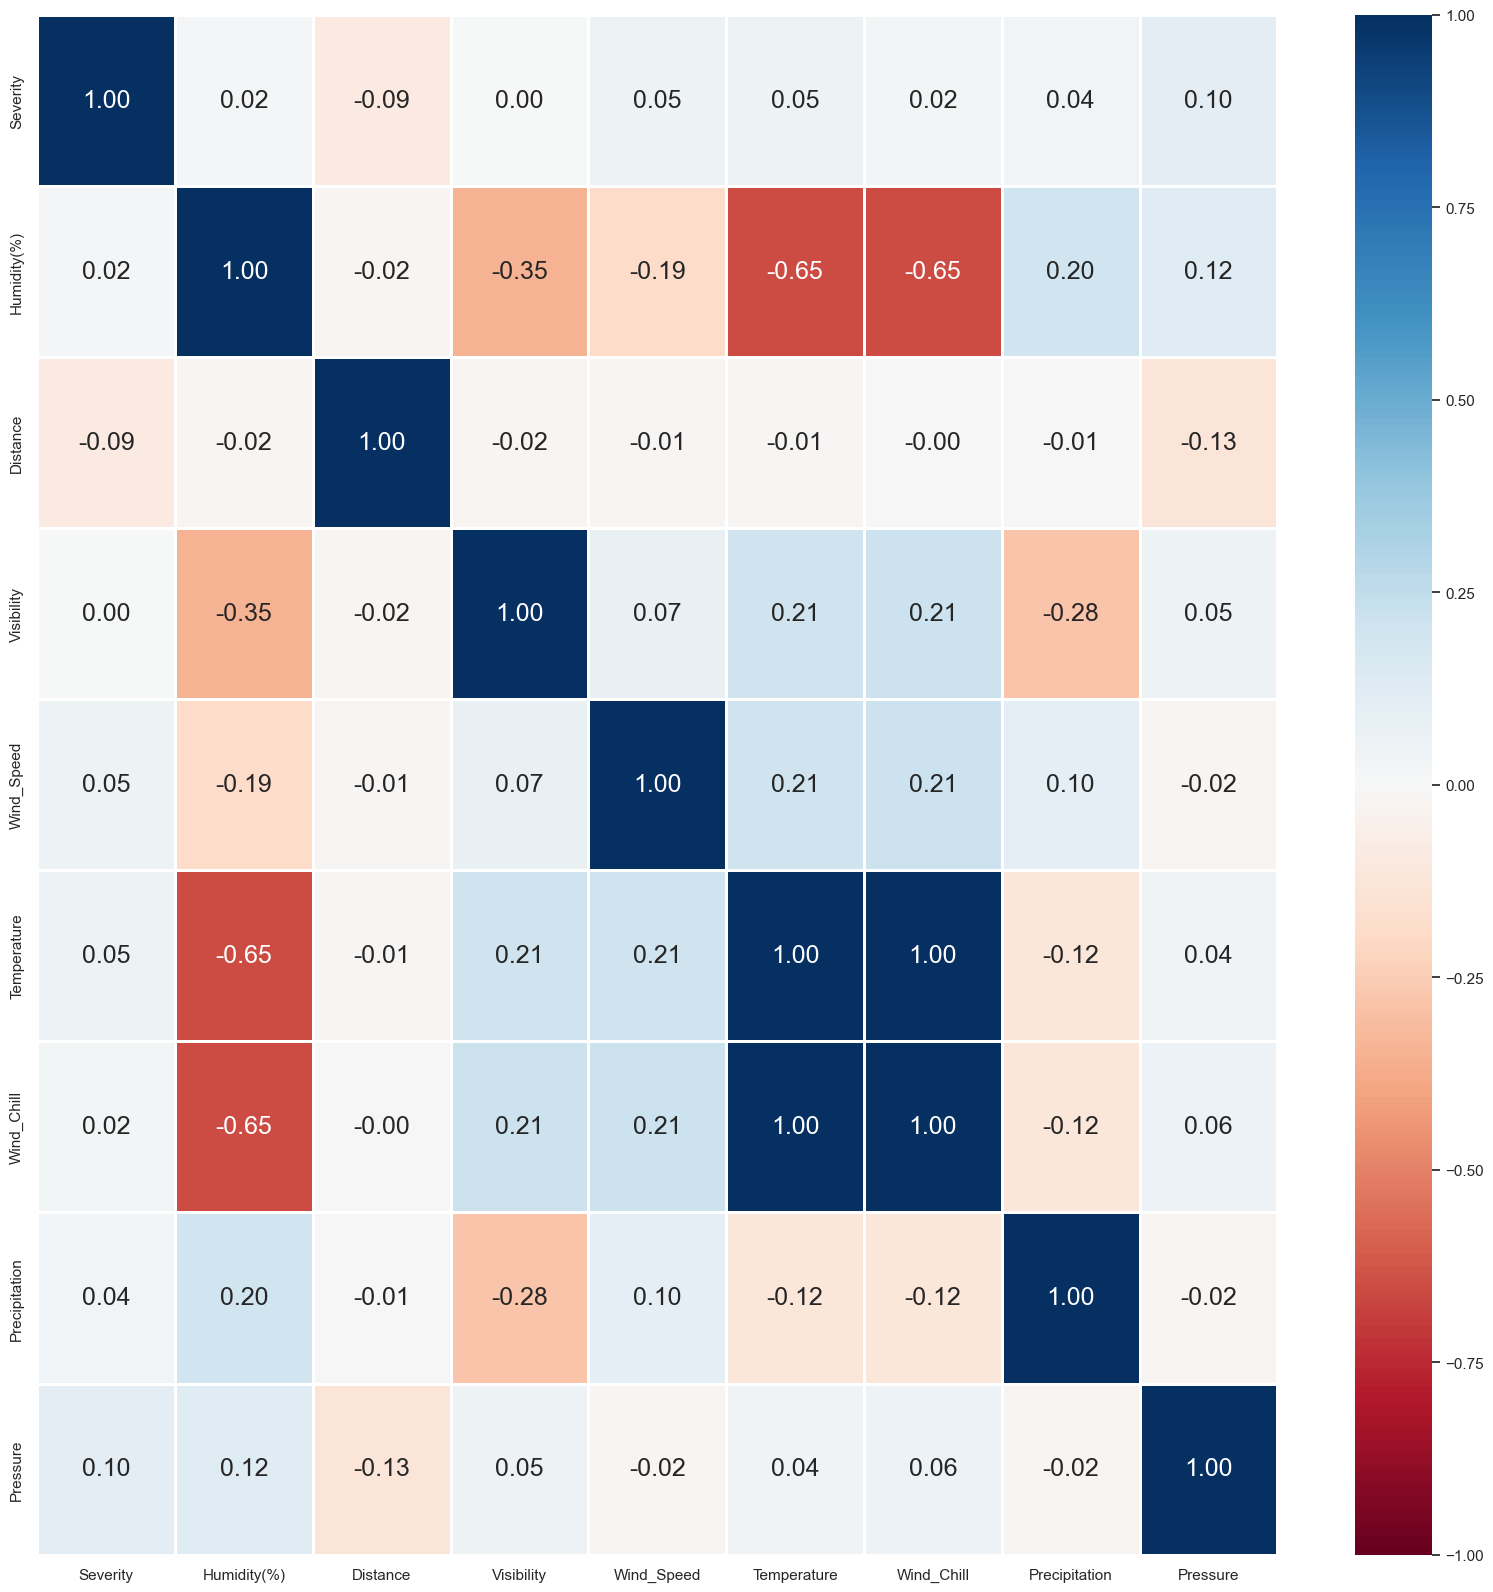

In [21]:
    # Correlation Matrix
    print(numeric_data.corr())

    # Heatmap of the Correlation Matrix
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

C:\Users\fazli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


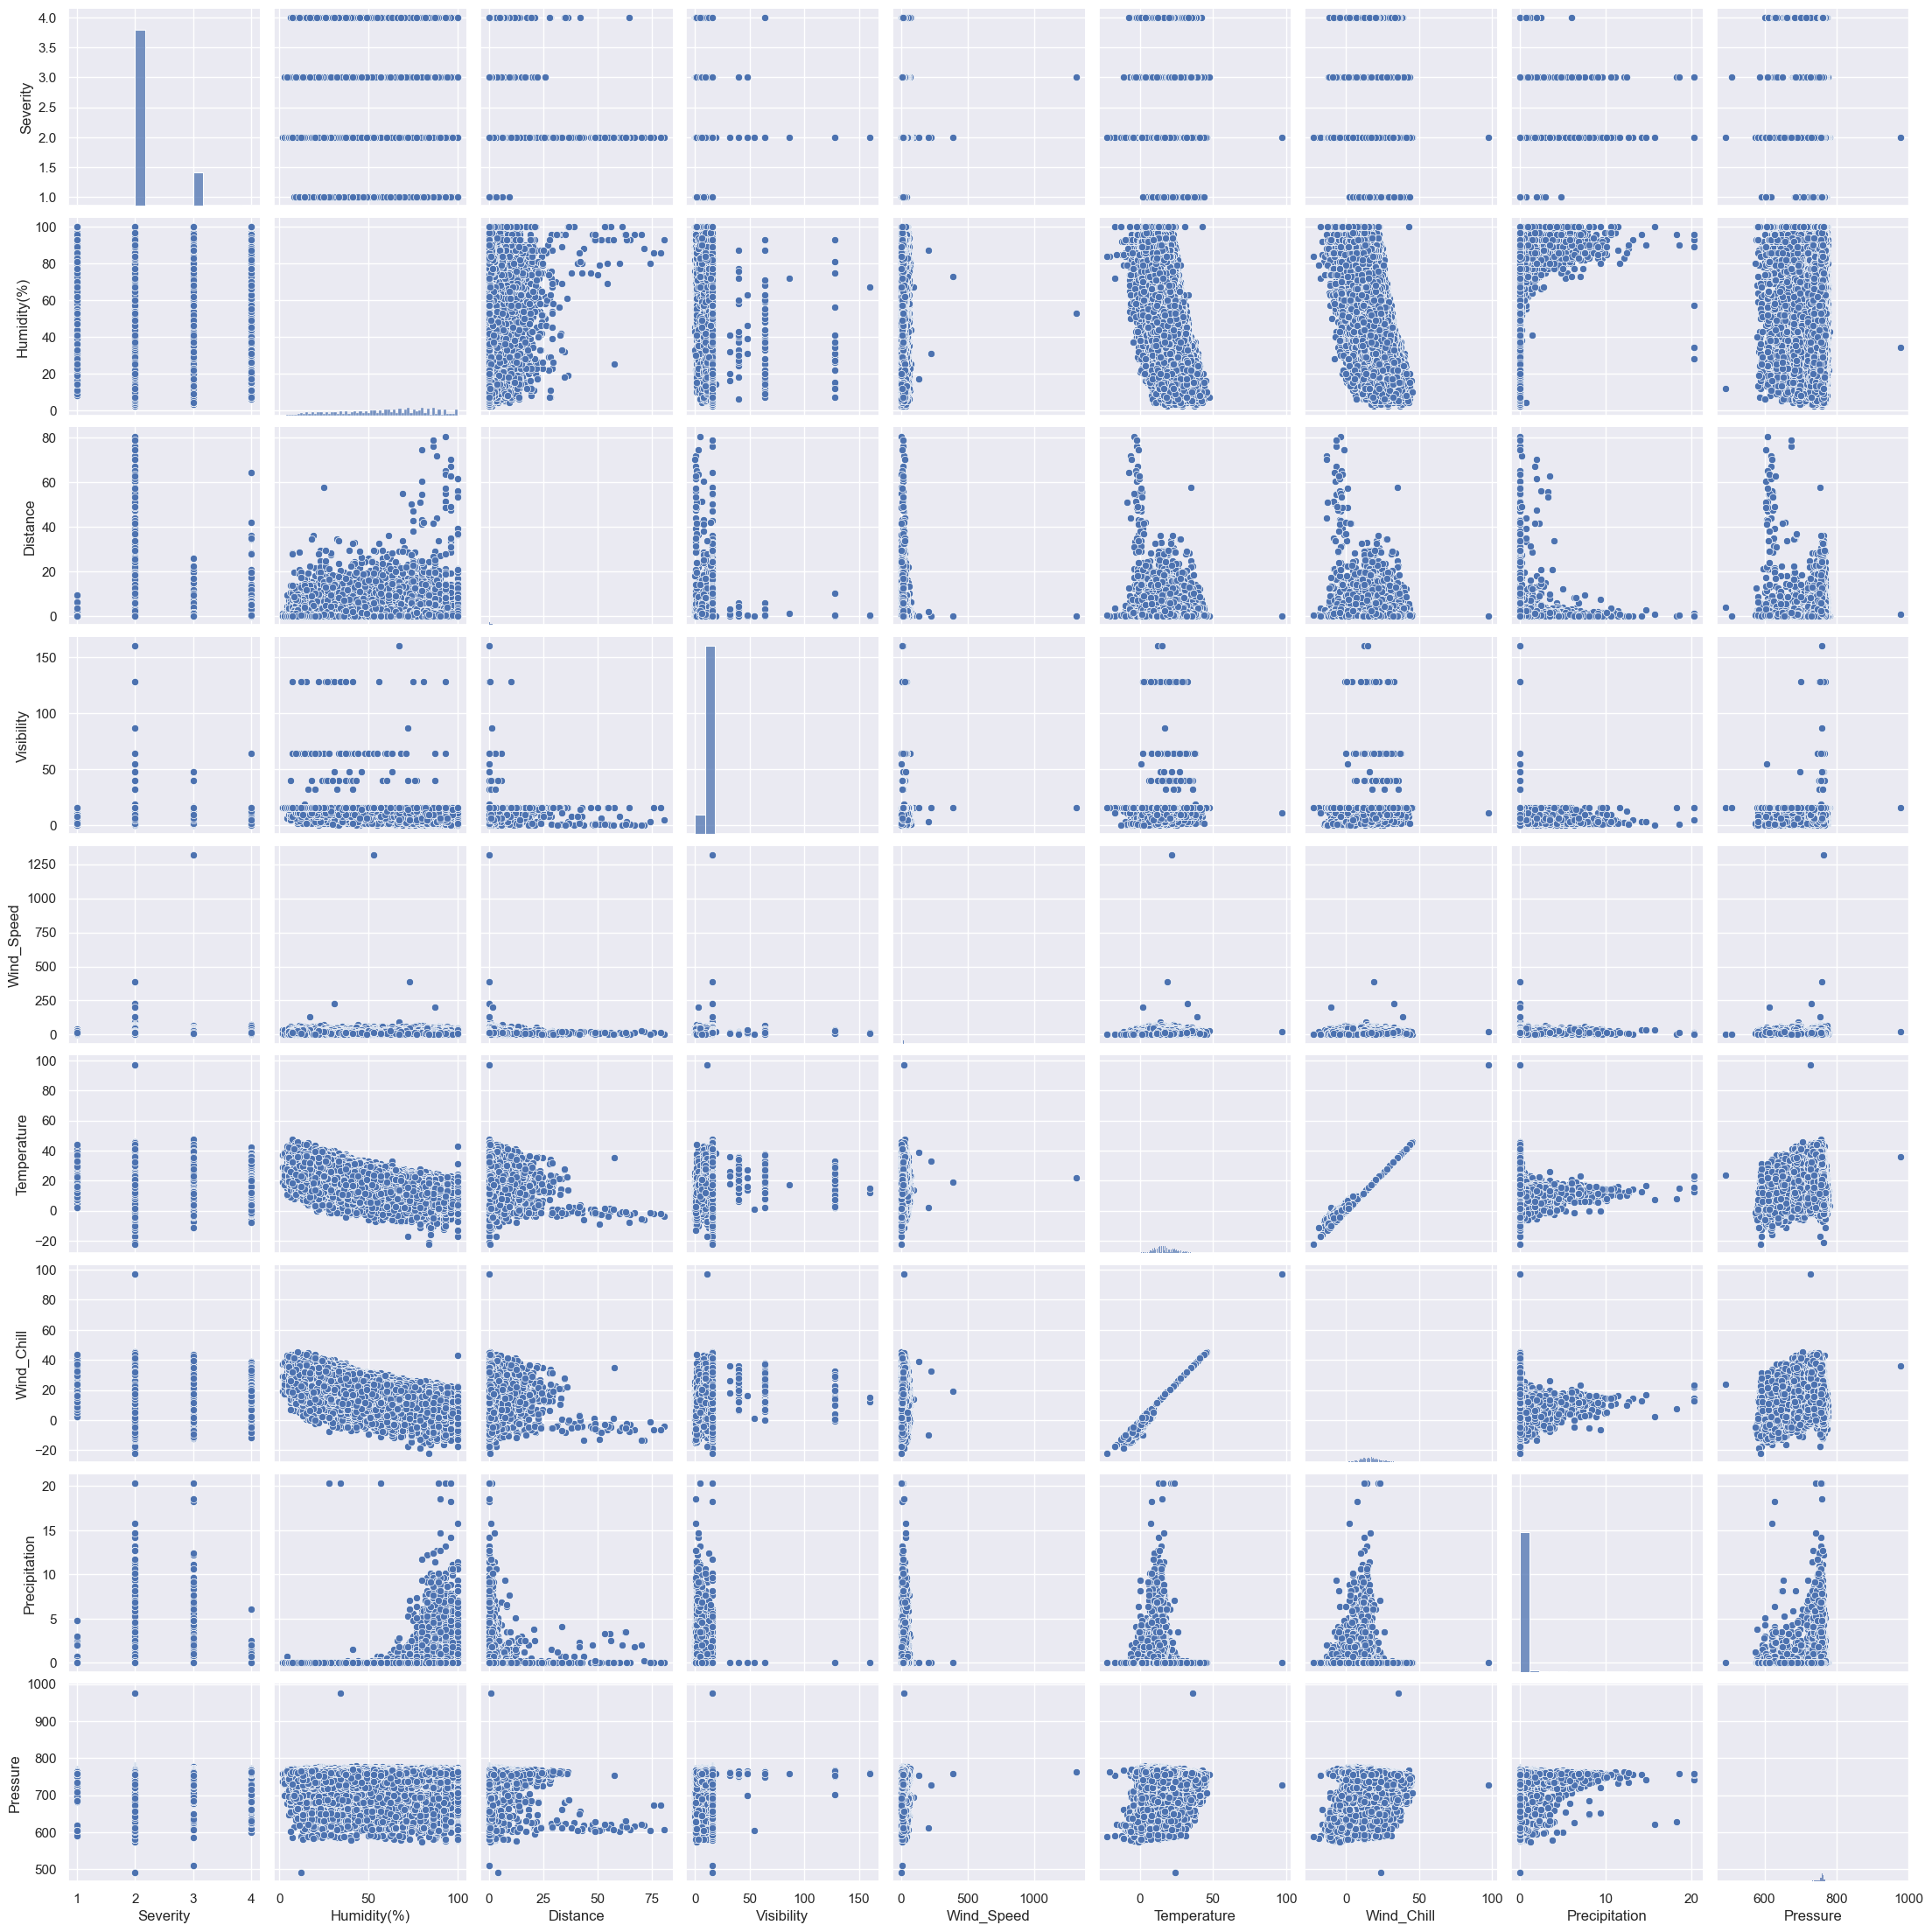

In [22]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)

In [23]:
severity_4_df = pd.DataFrame(cal_accident_df[cal_accident_df["Severity"] == 4])
severity_3_df = pd.DataFrame(cal_accident_df[cal_accident_df["Severity"] == 3])
severity_2_df = pd.DataFrame(cal_accident_df[cal_accident_df["Severity"] == 2])
severity_1_df = pd.DataFrame(cal_accident_df[cal_accident_df["Severity"] == 1])

In [24]:
severity_4_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 90 to 113204
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             866 non-null    int64         
 1   Severity               866 non-null    int64         
 2   Start_Time             866 non-null    datetime64[ns]
 3   Start_Lat              866 non-null    float64       
 4   Start_Lng              866 non-null    float64       
 5   Street                 865 non-null    object        
 6   City                   866 non-null    object        
 7   County                 866 non-null    object        
 8   Zipcode                866 non-null    object        
 9   Humidity(%)            812 non-null    float64       
 10  Wind_Direction         815 non-null    object        
 11  Weather_Condition      813 non-null    object        
 12  Amenity                866 non-null    bool          
 13  Bump  

## Severity = 4

In [25]:
severity_4_df[["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature", 
                "Wind_Chill", "Precipitation", "Pressure"]].describe()

,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,812.000000,866.000000,817.000000,719.000000,813.000000,515.000000,503.000000,819.000000
mean,59.522167,1.760297,14.558766,11.103199,17.822878,17.757282,0.061606,751.263770
std,24.196957,4.609161,4.018706,9.240395,8.151093,9.104586,0.367419,24.512603
min,6.000000,0.000000,0.000000,0.000000,-7.777778,-11.666667,0.000000,600.202000
25%,40.750000,0.139200,16.000000,4.800000,12.777778,12.222222,0.000000,752.348000
50%,62.000000,0.545600,16.000000,9.600000,17.222222,17.222222,0.000000,758.698000
75%,80.000000,1.536400,16.000000,14.720000,22.777778,23.888889,0.000000,761.746000
max,100.000000,64.430400,64.000000,73.600000,42.222222,38.888889,6.096000,773.430000


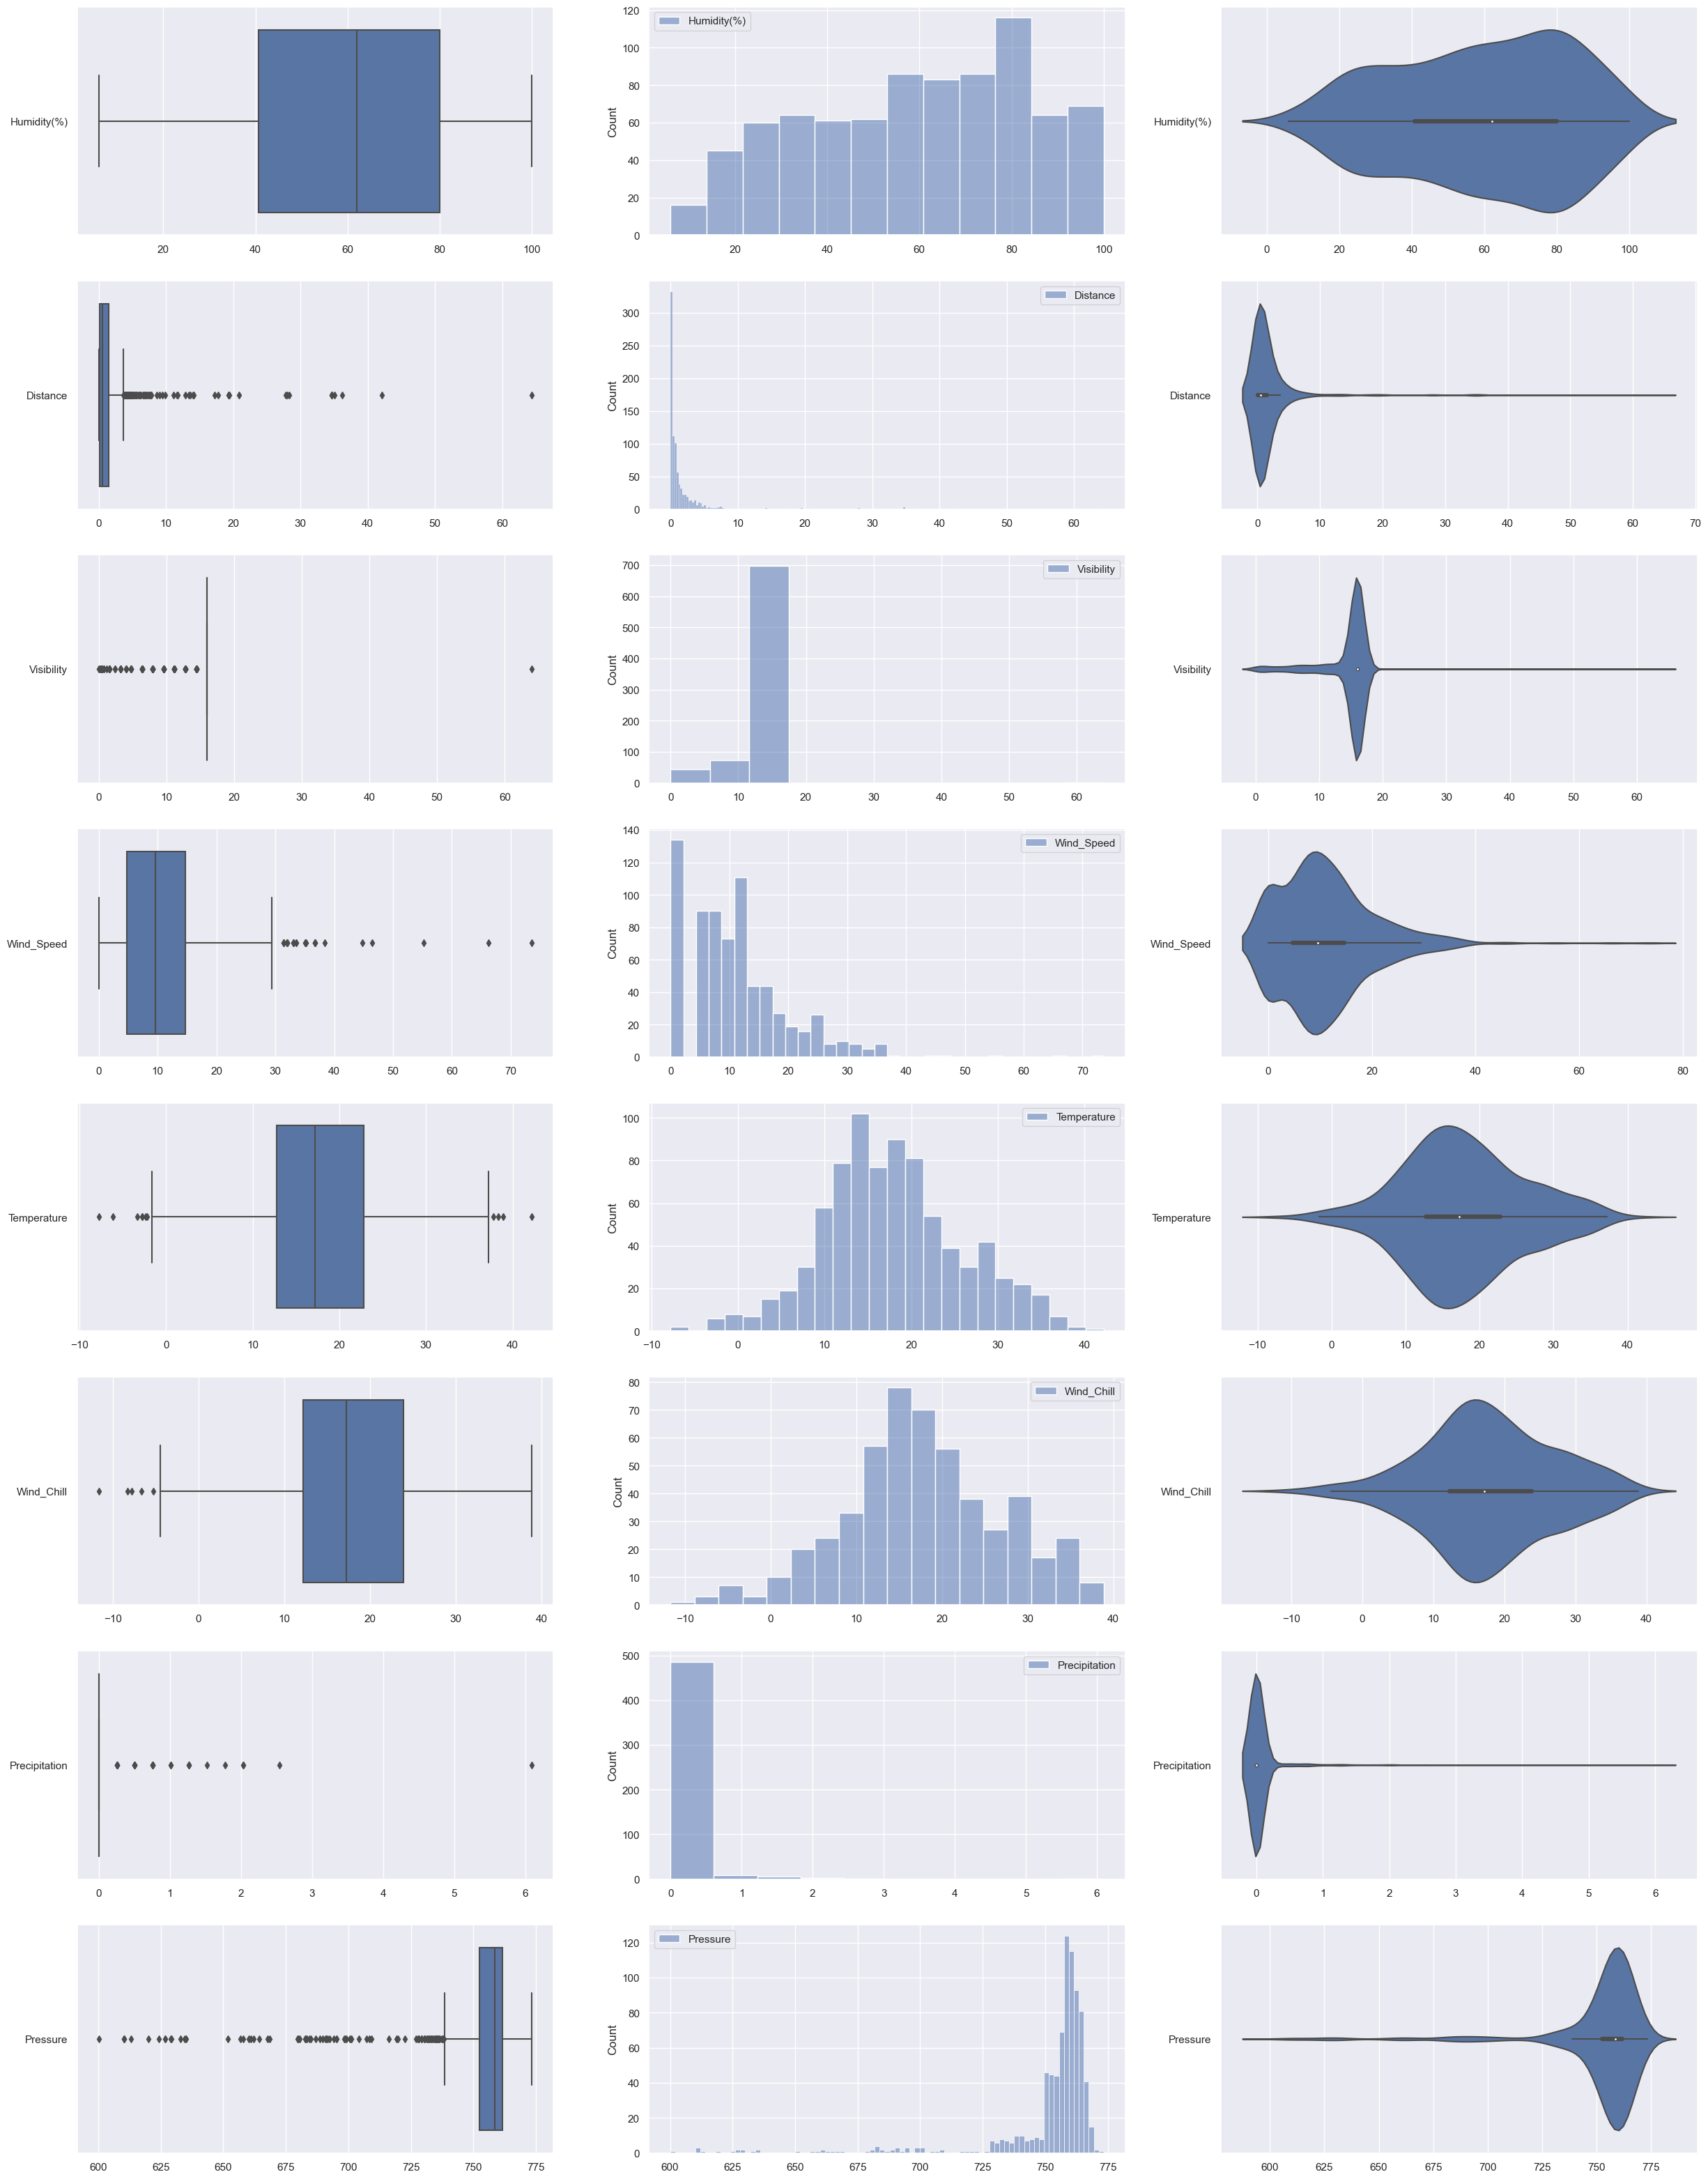

In [26]:
numeric_value = ["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature", 
                "Wind_Chill", "Precipitation", "Pressure"]

f, axes = plt.subplots(8, 3, figsize=(30, 40))

count = 0
for var in numeric_value:
    temp_db = pd.DataFrame(severity_4_df[var])
    sb.boxplot(data = temp_db, orient = "h", ax = axes[count, 0])
    sb.histplot(data = temp_db, ax = axes[count,1])
    sb.violinplot(data = temp_db, orient = "h", ax = axes[count,2])
    count += 1



## Severity = 3

In [27]:
severity_3_df[["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature", 
                "Wind_Chill", "Precipitation", "Pressure"]].describe()

,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,17332.000000,17758.000000,17428.000000,14465.000000,17353.000000,6218.000000,6296.000000,17462.000000
mean,60.162359,0.163064,14.577916,11.710905,18.655702,17.970775,0.199254,757.995362
std,22.806964,0.765528,3.313362,13.161450,6.596881,7.440304,0.931354,11.315866
min,3.000000,0.000000,0.000000,0.000000,-11.000000,-12.222222,0.000000,509.016000
25%,44.000000,0.000000,16.000000,7.360000,14.000000,13.333333,0.000000,757.682000
50%,63.000000,0.000000,16.000000,11.040000,18.277778,17.777778,0.000000,760.222000
75%,78.000000,0.016000,16.000000,16.000000,22.777778,22.222222,0.000000,762.762000
max,100.000000,25.664001,48.000000,1316.480000,47.222222,43.888889,20.320000,776.224000


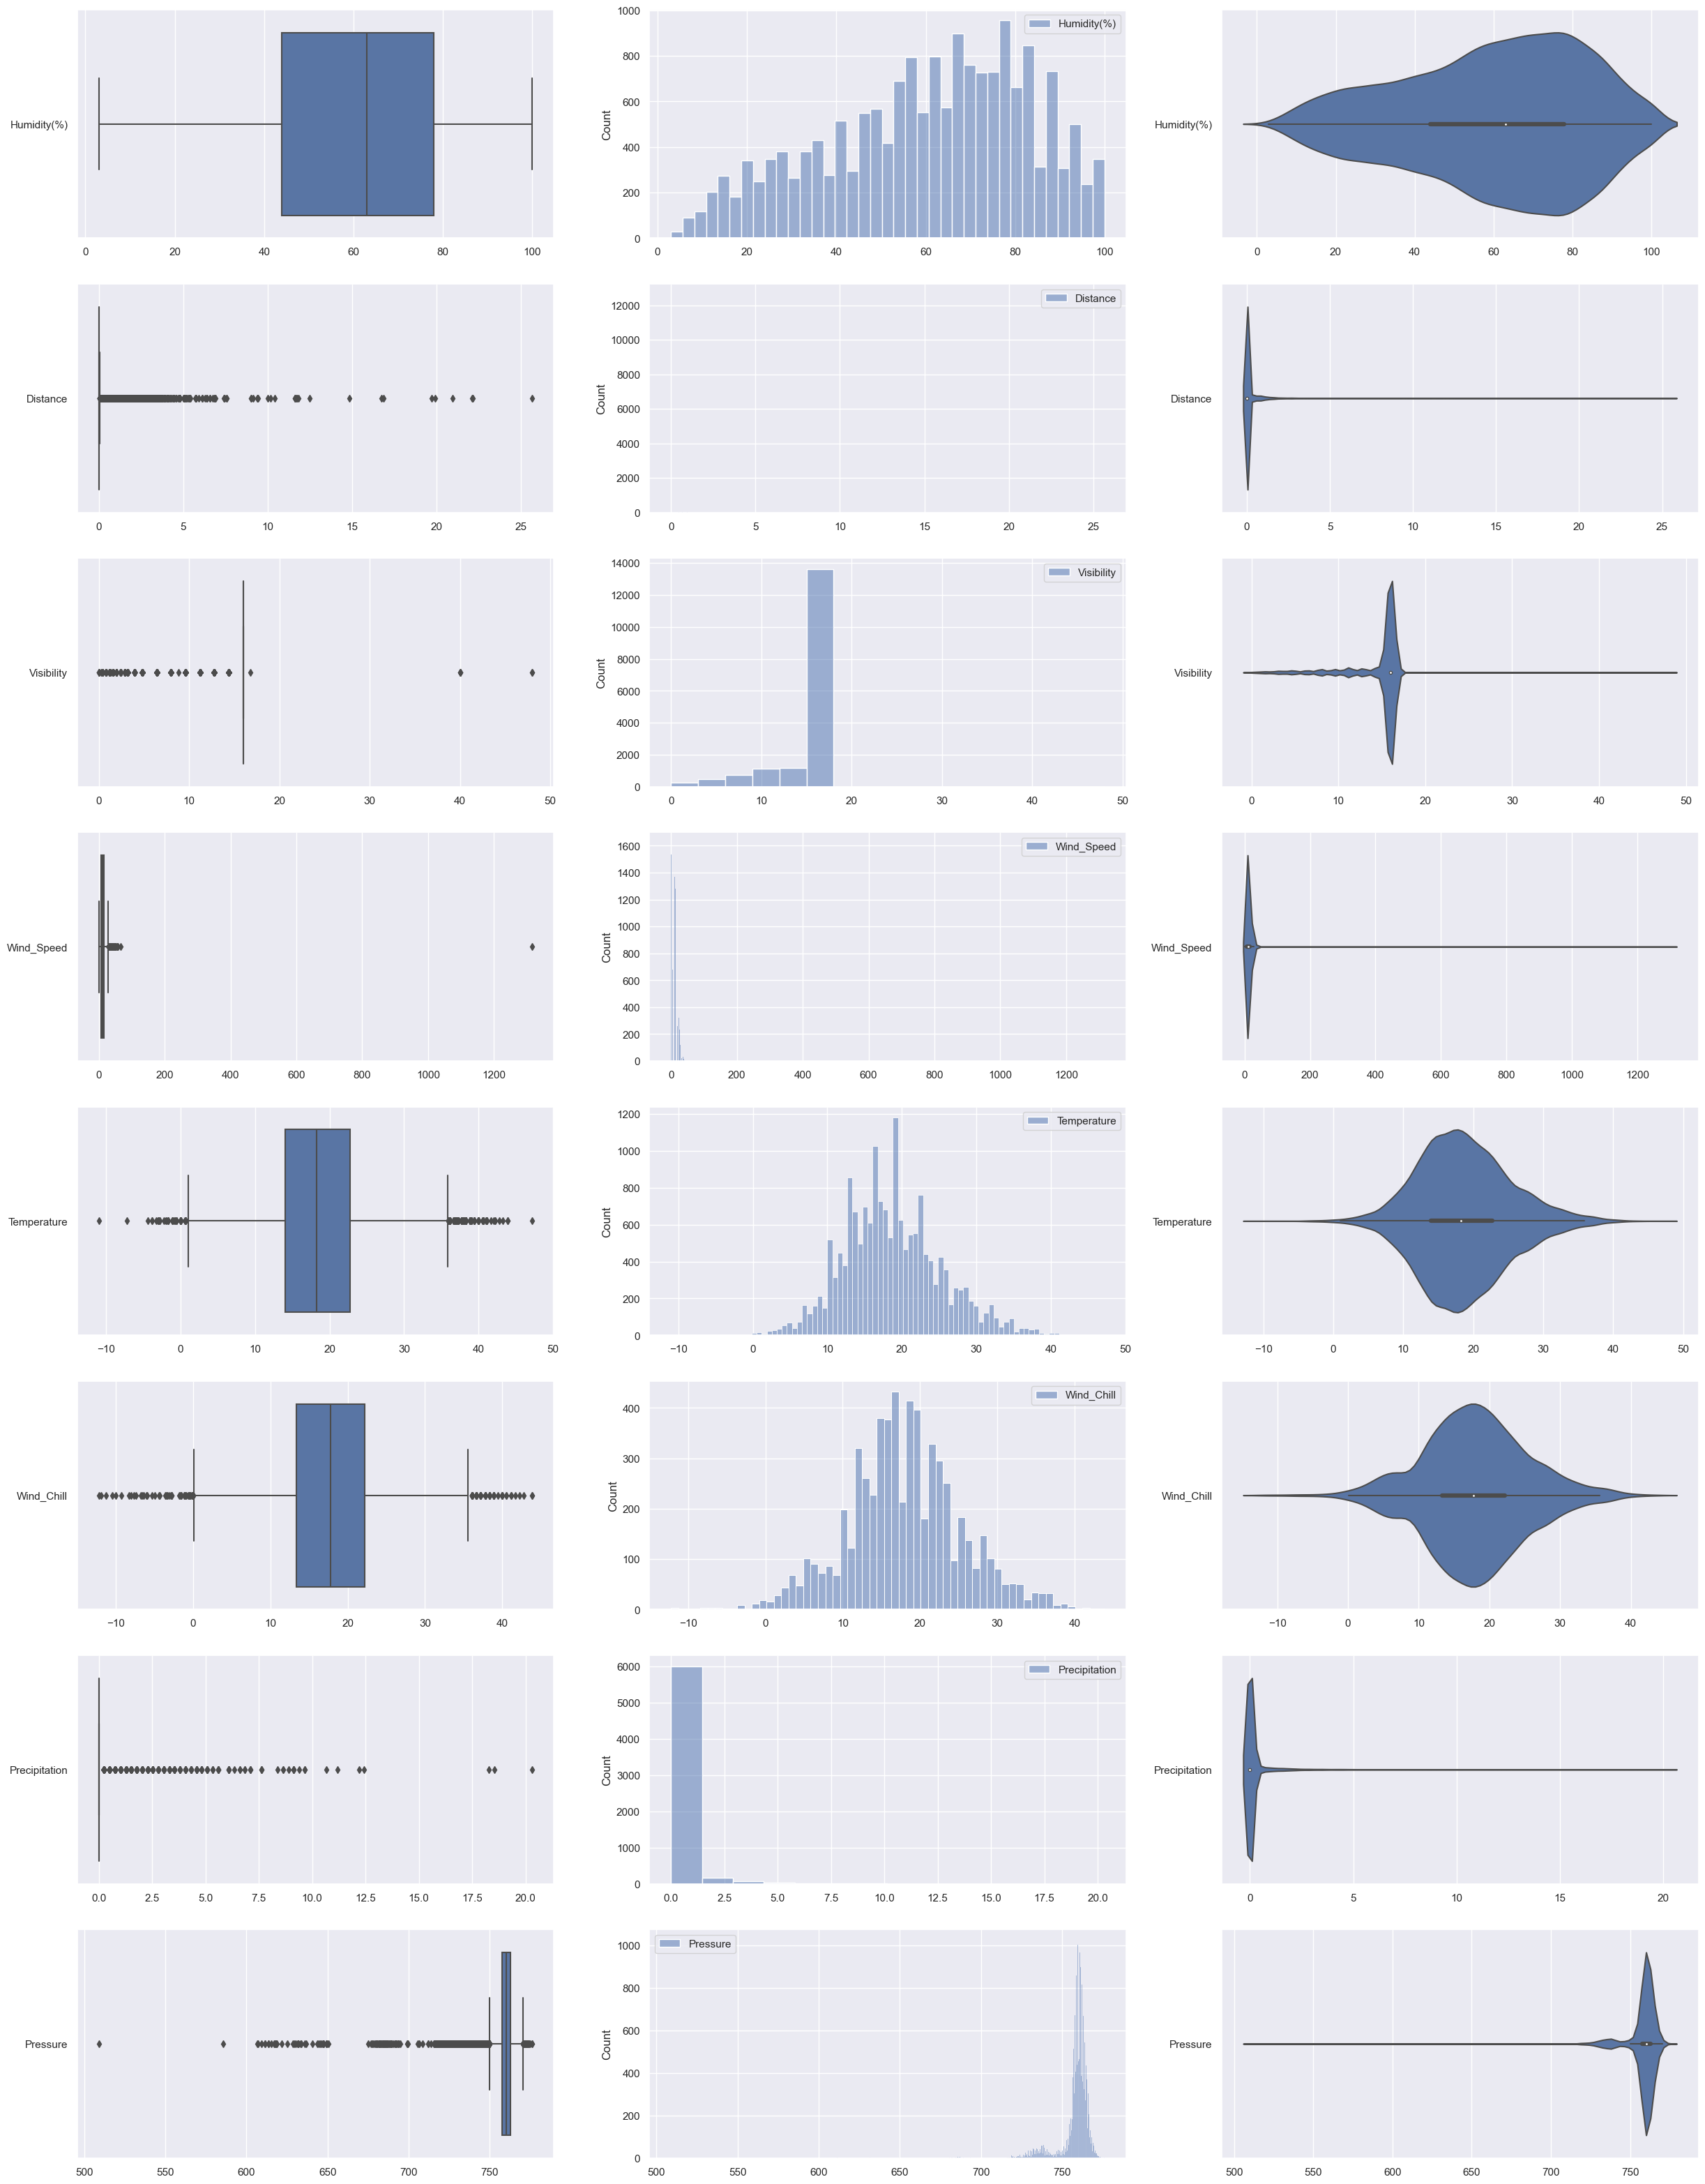

In [28]:
f, axes = plt.subplots(8, 3, figsize=(30, 40))

count = 0
for var in numeric_value:
    temp_db = pd.DataFrame(severity_3_df[var])
    sb.boxplot(data = temp_db, orient = "h", ax = axes[count, 0])
    sb.histplot(data = temp_db, ax = axes[count,1])
    sb.violinplot(data = temp_db, orient = "h", ax = axes[count,2])
    count += 1



## Severity = 2

In [29]:
severity_2_df[["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature", 
                "Wind_Chill", "Precipitation", "Pressure"]].describe()

,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,91417.000000,93972.000000,91839.000000,86937.000000,91557.000000,72942.000000,69342.000000,92028.000000
mean,58.594113,0.903021,14.515493,10.216218,17.487490,16.946379,0.094982,751.561444
std,24.472607,2.390474,4.149304,8.533905,7.691207,8.131432,0.605240,20.608168
min,2.000000,0.000000,0.000000,0.000000,-22.222222,-22.222222,0.000000,491.744000
25%,39.000000,0.000000,16.000000,4.800000,12.222222,11.666667,0.000000,750.570000
50%,61.000000,0.107200,16.000000,9.600000,17.000000,16.666667,0.000000,757.936000
75%,78.000000,0.832400,16.000000,14.400000,22.222222,22.222222,0.000000,761.492000
max,100.000000,80.499200,160.000000,388.800000,97.222222,97.222222,20.320000,976.376000


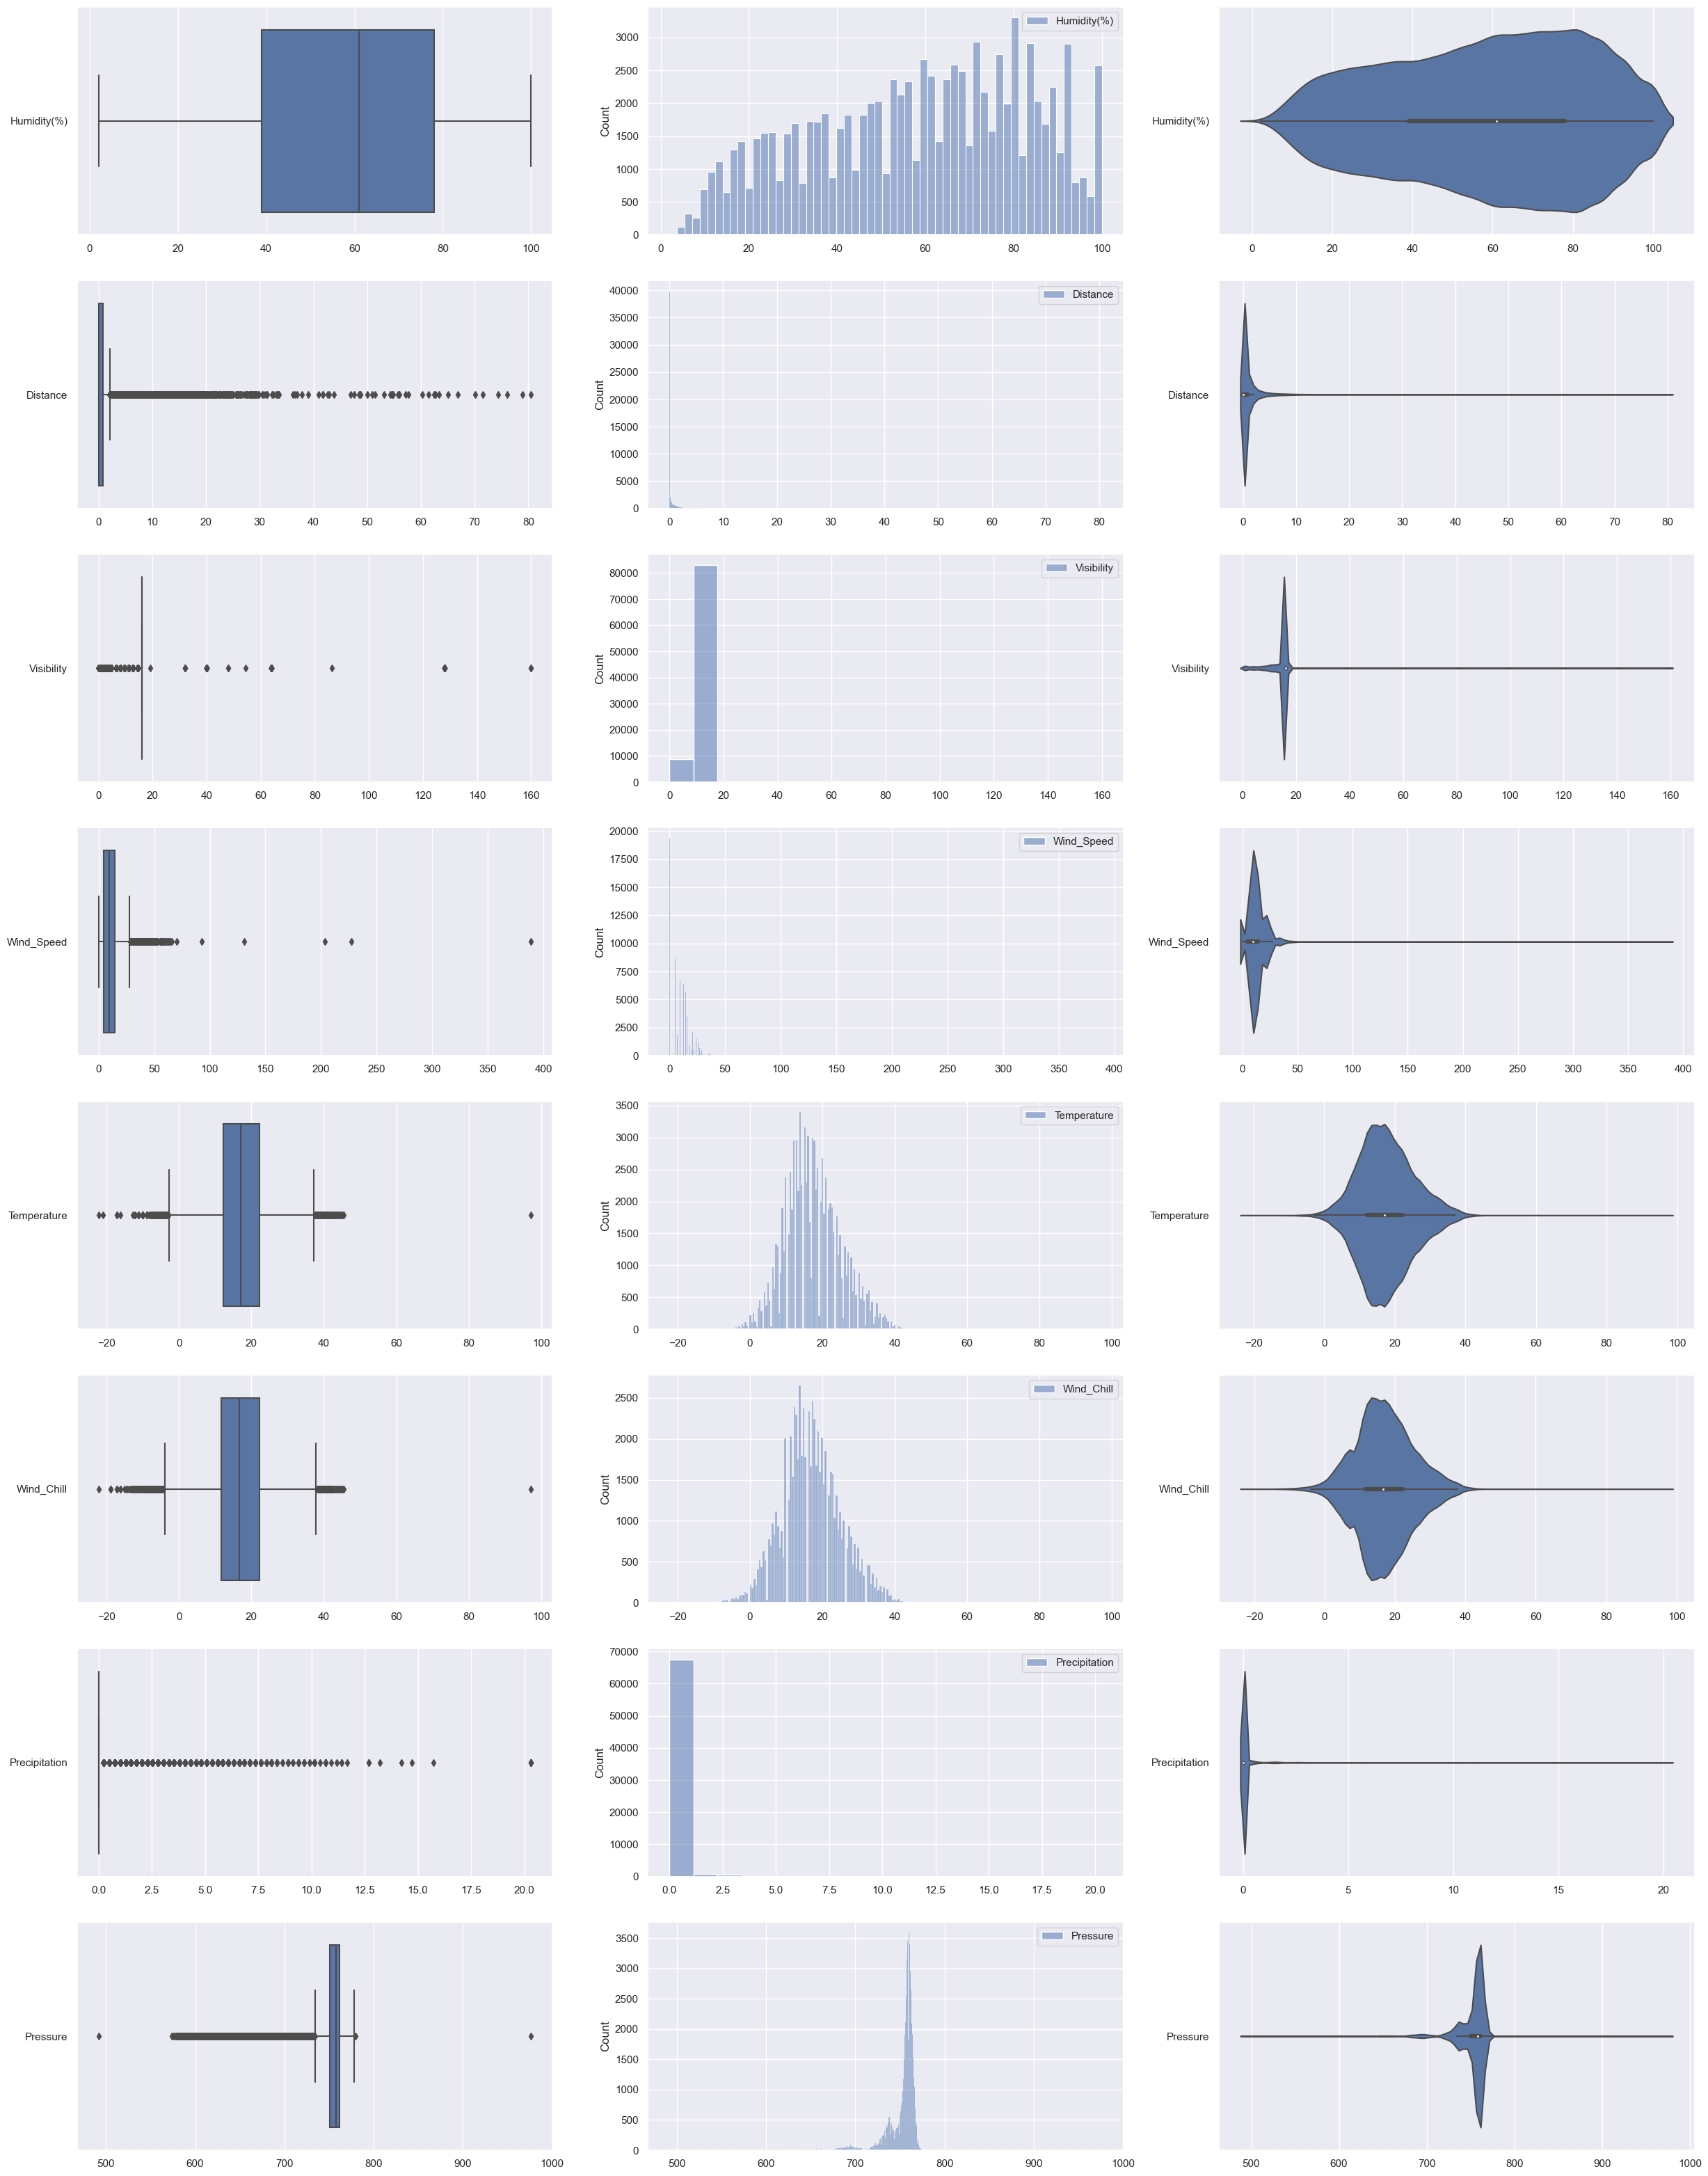

In [30]:
f, axes = plt.subplots(8, 3, figsize=(30, 40))

count = 0
for var in numeric_value:
    temp_db = pd.DataFrame(severity_2_df[var])
    sb.boxplot(data = temp_db, orient = "h", ax = axes[count, 0])
    sb.histplot(data = temp_db, ax = axes[count,1])
    sb.violinplot(data = temp_db, orient = "h", ax = axes[count,2])
    count += 1

## Severity = 1

In [31]:
severity_1_df[["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature", 
                "Wind_Chill", "Precipitation", "Pressure"]].describe()

,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,659.000000,678.000000,659.000000,648.000000,659.000000,635.000000,572.000000,660.000000
mean,60.227618,0.068116,15.126555,11.473580,19.304249,19.237970,0.042629,754.479291
std,23.984286,0.512638,2.665861,8.617323,7.812167,7.944433,0.325530,17.024759
min,8.000000,0.000000,0.400000,0.000000,2.222222,2.222222,0.000000,591.312000
25%,42.500000,0.000000,16.000000,4.800000,13.888889,13.333333,0.000000,753.872000
50%,63.000000,0.000000,16.000000,11.200000,17.777778,17.777778,0.000000,757.936000
75%,81.000000,0.000000,16.000000,16.000000,23.888889,24.444444,0.000000,760.793500
max,100.000000,9.232000,16.000000,41.600000,43.888889,43.888889,4.826000,770.382000


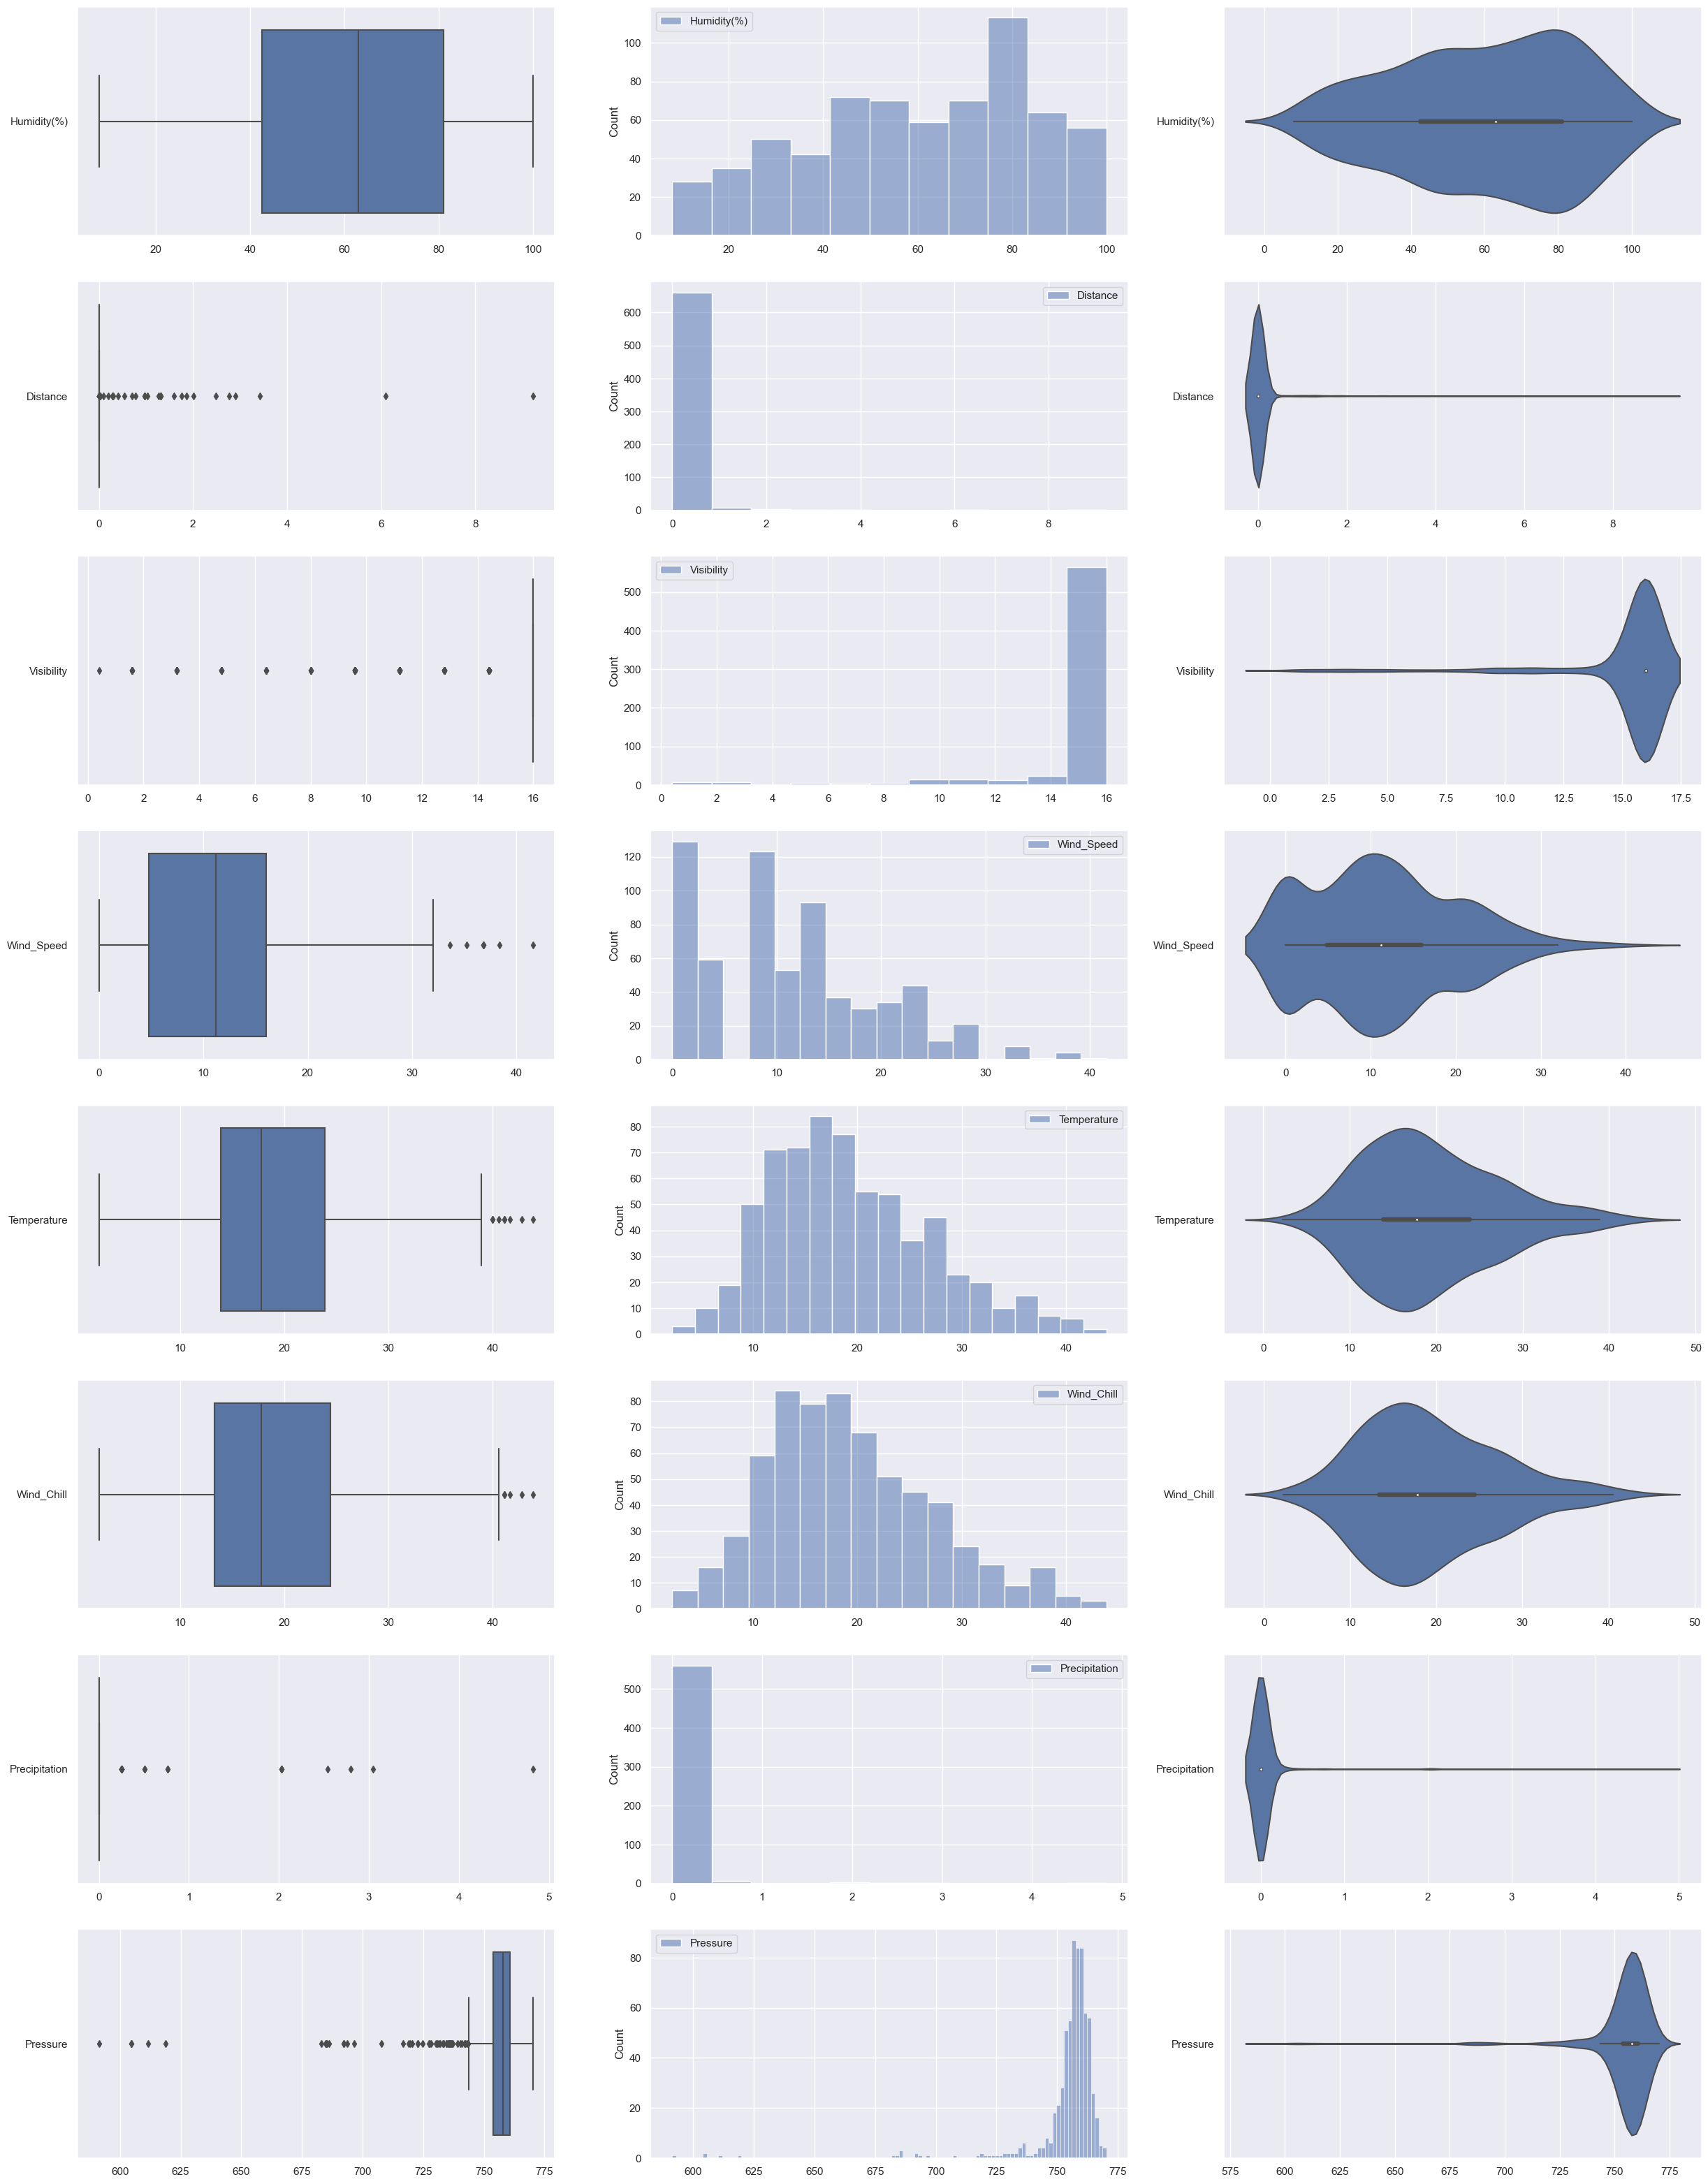

In [32]:
f, axes = plt.subplots(8, 3, figsize=(30, 40))

count = 0
for var in numeric_value:
    temp_db = pd.DataFrame(severity_1_df[var])
    sb.boxplot(data = temp_db, orient = "h", ax = axes[count, 0])
    sb.histplot(data = temp_db, ax = axes[count,1])
    sb.violinplot(data = temp_db, orient = "h", ax = axes[count,2])
    count += 1

From the analysis of how variables - 
`Humidity(%)`, `Distance`, `Visibility`, `Wind_Speed`, `Temperature`, `Wind_Chill`, `Precipitation`, `Pressure` 

we can see that most accidents occur in normal weather condition. This shows that drivers may be driving less carefully in good weather conditions as compared to poor weather conditions. This may be due to complacency of drivers when driving in good weather where there are not focusing as much. 